In [68]:
import math
import numpy as np
import csv

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

In [69]:
df = pd.read_csv('/content/data_1.csv')
df.head()

,Địa phương,Năm,Diện tích(Km2),Dân số trung bình (Nghìn người),Mật độ dân số (Người/km2),Diện tích(Km2)(*),Diện tích (Km2)(*),Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,An Giang,2011,"3536,7","2097,5","593,1",..,..,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,An Giang,2012,"3536,7","2077,9","587,5",..,..,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,An Giang,2013,"3536,7","2051,6","580,1",..,..,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,An Giang,2014,"3536,7","2024,6","572,5",..,..,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,An Giang,2015,"3536,7","2000,9","565,8",..,..,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [70]:
df = df.dropna(axis=1, how='all')

In [71]:
df = df.replace("..", np.nan)

In [72]:
df = df.rename(columns={
    'Diện tích(Km2)(*)': 'Diện tích phụ lục 1(Km2)',
    'Diện tích (Km2)(*)': 'Diện tích phụ lục 2(Km2)'
})

In [73]:
df.head()

,Địa phương,Năm,Diện tích(Km2),Dân số trung bình (Nghìn người),Mật độ dân số (Người/km2),Diện tích phụ lục 1(Km2),Diện tích phụ lục 2(Km2)
0,An Giang,2011,"3536,7","2097,5","593,1",NaN,NaN
1,An Giang,2012,"3536,7","2077,9","587,5",NaN,NaN
2,An Giang,2013,"3536,7","2051,6","580,1",NaN,NaN
3,An Giang,2014,"3536,7","2024,6","572,5",NaN,NaN
4,An Giang,2015,"3536,7","2000,9","565,8",NaN,NaN


In [74]:
df['Diện tích phụ lục 1(Km2)'] = df['Diện tích phụ lục 1(Km2)'].fillna(df['Diện tích phụ lục 2(Km2)'])

In [75]:
df['Diện tích(Km2)'] = df['Diện tích(Km2)'].fillna(df['Diện tích phụ lục 1(Km2)'])

In [76]:
df

,Địa phương,Năm,Diện tích(Km2),Dân số trung bình (Nghìn người),Mật độ dân số (Người/km2),Diện tích phụ lục 1(Km2),Diện tích phụ lục 2(Km2)
0,An Giang,2011,"3536,7","2097,5","593,1",NaN,NaN
1,An Giang,2012,"3536,7","2077,9","587,5",NaN,NaN
2,An Giang,2013,"3536,7","2051,6","580,1",NaN,NaN
3,An Giang,2014,"3536,7","2024,6","572,5",NaN,NaN
4,An Giang,2015,"3536,7","2000,9","565,8",NaN,NaN
...,...,...,...,...,...,...,...
905,Đồng Tháp,2019,"3383,8","1598,8","472,0","3383,8",NaN
906,Đồng Tháp,2020,"3382,3","1600,0","473,0","3382,3","3382,3"
907,Đồng Tháp,2021,"3382,3","1601,3","473,0","3382,3",NaN
908,Đồng Tháp,2022,"3382,3","1600,2","473,0","3382,3",NaN


In [77]:
df.drop(['Diện tích phụ lục 1(Km2)', 'Diện tích phụ lục 2(Km2)'], axis=1, inplace=True)

In [78]:
df.head()

,Địa phương,Năm,Diện tích(Km2),Dân số trung bình (Nghìn người),Mật độ dân số (Người/km2)
0,An Giang,2011,"3536,7","2097,5","593,1"
1,An Giang,2012,"3536,7","2077,9","587,5"
2,An Giang,2013,"3536,7","2051,6","580,1"
3,An Giang,2014,"3536,7","2024,6","572,5"
4,An Giang,2015,"3536,7","2000,9","565,8"


In [79]:
_df = pd.read_csv('/content/data_2.csv')
_df.head()

,Địa phương,Phân tổ,2005,2007,2008,2009,2010,2011,2012,2013,...,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39
0,An Giang,Tỷ suất sinh thô,"18,40","16,90","16,90","17,60","17,30","16,40","17,50","16,30",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,An Giang,Tỷ suất chết thô,"5,20","5,10","5,00","8,00","7,90","7,30","7,80","7,80",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,An Giang,Tỷ lệ tăng tự nhiên,"13,20","11,80","11,90","9,70","9,30","9,00","9,60","8,50",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Bà Rịa - Vũng Tàu,Tỷ suất sinh thô,"18,50","16,90","17,10","17,70","15,60","15,20","14,90","16,20",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Bà Rịa - Vũng Tàu,Tỷ suất chết thô,"4,40","4,40","4,10","6,60","6,50","6,30","7,10","7,50",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [80]:
_df = _df.dropna(axis=1, how='all')

In [81]:
_df = _df.replace("..", np.nan)

In [82]:
_df = _df.rename(columns={
    'Sơ bộ 2023': '2023',
})

In [83]:
_df.head()

,Địa phương,Phân tổ,2005,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,An Giang,Tỷ suất sinh thô,"18,40","16,90","16,90","17,60","17,30","16,40","17,50","16,30","16,70","12,50","12,50","11,60","11,40","11,90","12,51","12,10","11,70","10,80"
1,An Giang,Tỷ suất chết thô,"5,20","5,10","5,00","8,00","7,90","7,30","7,80","7,80","8,80","7,50","8,80","9,70","8,60","9,70","9,27","8,10","9,03","6,85"
2,An Giang,Tỷ lệ tăng tự nhiên,"13,20","11,80","11,90","9,70","9,30","9,00","9,60","8,50","7,90","4,90","3,70","1,90","2,80","2,30","3,24","3,99","2,67","3,95"
3,Bà Rịa - Vũng Tàu,Tỷ suất sinh thô,"18,50","16,90","17,10","17,70","15,60","15,20","14,90","16,20","16,50","12,50","12,10","10,50","11,00","14,80","15,75","13,90","15,70","11,50"
4,Bà Rịa - Vũng Tàu,Tỷ suất chết thô,"4,40","4,40","4,10","6,60","6,50","6,30","7,10","7,50","5,10","4,50","4,40","5,60","5,00","5,00","4,77","5,40","4,65","5,35"


In [118]:
_df.melt(id_vars=["Địa phương", "Phân tổ"], var_name="Năm", value_name="Tỷ lệ")

,Địa phương,Phân tổ,Năm,Tỷ lệ
0,An Giang,Tỷ suất sinh thô,2005,"18,40"
1,An Giang,Tỷ suất chết thô,2005,"5,20"
2,An Giang,Tỷ lệ tăng tự nhiên,2005,"13,20"
3,Bà Rịa - Vũng Tàu,Tỷ suất sinh thô,2005,"18,50"
4,Bà Rịa - Vũng Tàu,Tỷ suất chết thô,2005,"4,40"
...,...,...,...,...
3829,Đồng Nai,Tỷ suất chết thô,2023,"4,16"
3830,Đồng Nai,Tỷ lệ tăng tự nhiên,2023,"8,79"
3831,Đồng Tháp,Tỷ suất sinh thô,2023,"12,10"
3832,Đồng Tháp,Tỷ suất chết thô,2023,"6,22"


In [84]:
data_melted = _df.melt(id_vars=["Địa phương", "Phân tổ"], var_name="Năm", value_name="Tỷ lệ")

data_melted = data_melted.dropna(subset=["Năm", "Tỷ lệ"])
data_melted = data_melted.loc[~data_melted["Năm"].str.contains("Unnamed")]

data_melted["Năm"] = data_melted["Năm"].astype(int)
data_melted["Tỷ lệ"] = data_melted["Tỷ lệ"].str.replace(",", ".").astype(float)

data_pivot = data_melted.pivot_table(index=["Địa phương", "Năm"], columns="Phân tổ", values="Tỷ lệ").reset_index()

data_pivot.columns.name = None
data_pivot = data_pivot.rename(columns={
    "Tỷ suất sinh thô": "Tỷ suất sinh thô",
    "Tỷ suất chết thô": "Tỷ suất chết thô",
    "Tỷ lệ tăng tự nhiên": "Tỷ lệ tăng tự nhiên"
})

data_pivot.head()

,Địa phương,Năm,Tỷ lệ tăng tự nhiên,Tỷ suất chết thô,Tỷ suất sinh thô
0,An Giang,2005,13.2,5.2,18.4
1,An Giang,2007,11.8,5.1,16.9
2,An Giang,2008,11.9,5.0,16.9
3,An Giang,2009,9.7,8.0,17.6
4,An Giang,2010,9.3,7.9,17.3


In [85]:
df = df.applymap(lambda x: x.title() if isinstance(x, str) else x)
data_pivot = data_pivot.applymap(lambda x: x.title() if isinstance(x, str) else x)

<ipython-input-85-b2951ad7c0ae>:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.title() if isinstance(x, str) else x)
<ipython-input-85-b2951ad7c0ae>:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data_pivot = data_pivot.applymap(lambda x: x.title() if isinstance(x, str) else x)


In [86]:
final_df = pd.merge(df, data_pivot, left_on=['Địa phương', 'Năm'], right_on=['Địa phương', 'Năm'], how='left')
final_df = final_df.applymap(lambda x: str(x).replace(',', '.') if isinstance(x, str) else x)
final_df = final_df.apply(pd.to_numeric, errors='ignore')
final_df

<ipython-input-86-400e816d62ad>:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  final_df = final_df.applymap(lambda x: str(x).replace(',', '.') if isinstance(x, str) else x)
<ipython-input-86-400e816d62ad>:3: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  final_df = final_df.apply(pd.to_numeric, errors='ignore')


,Địa phương,Năm,Diện tích(Km2),Dân số trung bình (Nghìn người),Mật độ dân số (Người/km2),Tỷ lệ tăng tự nhiên,Tỷ suất chết thô,Tỷ suất sinh thô
0,An Giang,2011,3536.7,2097.5,593.1,9.00,7.30,16.40
1,An Giang,2012,3536.7,2077.9,587.5,9.60,7.80,17.50
2,An Giang,2013,3536.7,2051.6,580.1,8.50,7.80,16.30
3,An Giang,2014,3536.7,2024.6,572.5,7.90,8.80,16.70
4,An Giang,2015,3536.7,2000.9,565.8,4.90,7.50,12.50
...,...,...,...,...,...,...,...,...
905,Đồng Tháp,2019,3383.8,1598.8,472.0,5.00,6.90,11.90
906,Đồng Tháp,2020,3382.3,1600.0,473.0,6.30,6.66,12.95
907,Đồng Tháp,2021,3382.3,1601.3,473.0,4.72,7.60,12.40
908,Đồng Tháp,2022,3382.3,1600.2,473.0,1.70,8.70,10.40


# Exploratory Data Analysis

### Mô tả

- Dữ liệu được thu thập từ trang web của Tổng cục Thống kê Việt Nam https://www.gso.gov.vn/

- Mô tả: Dữ liệu ghi nhận sự thay đổi về sự gia tăng dân số theo 63 tỉnh, thành phố của Việt Nam, được quan sát từ năm 2011 đến năm 2022.

In [87]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 910 entries, 0 to 909
Data columns (total 8 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Địa phương                       910 non-null    object 
 1   Năm                              910 non-null    int64  
 2   Diện tích(Km2)                   910 non-null    float64
 3   Dân số trung bình (Nghìn người)  910 non-null    float64
 4   Mật độ dân số (Người/km2)        910 non-null    float64
 5   Tỷ lệ tăng tự nhiên              845 non-null    float64
 6   Tỷ suất chết thô                 845 non-null    float64
 7   Tỷ suất sinh thô                 845 non-null    float64
dtypes: float64(6), int64(1), object(1)
memory usage: 57.0+ KB


Dataset gồm có 8 trường dữ liệu được lấy từ trang web như sau:

- ID: tên 63 tỉnh/thành phố của Việt Nam
- Năm: năm ghi nhận số liệu (format: yyyy)
- Diện tích: diện tích của thành phố (km2)
- Dân số trung bình: theo từng thành phố (nghìn người)
-	Mật độ dân số: Mật độ dân số là số người sinh sống trên một đơn vị diện tích, lấy theo giá trị trung bình. Từ giá trị này bạn có thể suy ra lượng tài nguyên mà một khu vực cần có, và dựa vào đó so sánh các khu vực khác nhau. Công thức tính: Mật độ dân số = (Dân số trung bình / Diện tích) * 1000 (đơn vị: Người/km2)
- Tỉ suất sinh thô: Tỷ suất sinh thô (CBR – Crude Birth Rate): được sử dụng rộng rãi trong dân số học, đó là tỷ số giữa số trẻ em được sinh ra trong năm so với số dân trung bình ở cùng thời gian ấy với đơn vị tính bằng phần nghìn (đơn vị ‰). Tỷ suất sinh thô được tính theo công thức :

  CBR = (Số trẻ em sinh ra trong năm / Tổng số dân trung bình của năm) * 1000
- Tỷ suất chết thô (CDR - Crude Death Rate) là chỉ tiêu đơn giản nhưng phổ biến nhất trong việc đánh giá mức tử vong của dân số. Nó được xác định bằng số người chết trong năm tính bình quân cho 1.000 dân số năm đó (đơn vị ‰)

  CDR = (Số người chết trong năm / Tổng số dân trung bình của năm) * 1000

- Tỷ lệ tăng tự nhiên cho biết cứ 1.000 dân số trung bình của một năm, thì có bao nhiêu người tăng lên trong năm do hậu quả của 2 yếu tố sinh ra và chết đi. Tỷ lệ gia tăng tự nhiên hay tỉ suất gia tăng tự nhiên là đến sự khác biệt hay sự chênh lệch giữa tỷ lệ sinh thô và tỷ lệ tử vong thô của một dân số nhất định (đơn vị ‰). Công thức xác định tỷ lệ gia tăng tự nhiên cụ thể như sau:

  Tỷ lệ tăng tự nhiên = Tỷ suất sinh thô – tỷ suất chết thô

### Ý nghĩa dữ liệu
- Trị số của tỷ suất sinh thô có sự biến động theo thời gian và không gian, trị số này phụ thuộc vào nhiều yếu tố: cường độ của quá trình sinh đẻ, cơ cấu dân số theo độ tuổi, giới tính và cả tình hình hôn nhân. Vì vậy tỷ suất sinh thô chỉ là một khái niệm phản ánh gần đúng mức sinh thực tế nhưng có ưu điểm là đơn giản, dễ tính toán, dễ so sánh nên được dùng khá phổ biến.
- Tỷ suất chết thô có ảnh hưởng đến quy mô, cơ cấu và tốc độ gia tăng dân số. So với các chỉ tiêu khác về mức độ chết, tỷ suất chết thô là chỉ tiêu có nguồn thông tin dễ thu thập, thường sẵn có và được tính toán đơn giản.
- Tỷ suất tăng tự nhiên dân số có ưu điểm là dễ tính toán, không đòi hỏi nhiều số liệu. Song nó có nhược điểm là phụ thuộc rất chặt vào cơ cấu dân số theo độ tuổi, vì thế nó không được sử dụng trực tiếp để đánh giá mức độ tái sản suất dân số.
- Do tỷ suất tăng tự nhiên dân số trực tiếp phụ thuộc vào tỷ suất sinh thô (CBR) và tỷ suất chết thô (CDR), nên không bao giờ được dùng để đánh giá mức độ sinh hoặc kết quả công tác kế hoạch hóa gia đình.

### Ngữ cảnh sử dụng dữ liệu

- Đánh giá sự gia tăng dân số tự nhiên được hiểu cơ bản là quá trình tái sản xuất dân cư, thế hệ già được thay thế bằng thế hệ trẻ
- Tổ chức Y tế Thế giới (WHO) đã có được tất cả các giá trị được tính toán cho mỗi quốc gia trên toàn thế giới để từ đó có thể lên kế hoạch về hỗ trợ từng quốc gia.
- Tổ chức Y tế Thế giới cũng đã sử dụng các giá trị của tốc độ gia tăng tự nhiên để nhằm mục đích có thể đánh giá tiền tệ, nguồn nhân lực và sự hỗ trợ về mặt kĩ thuật họ đã cung cấp cho từng quốc gia.
- Để đưa ra các giải pháp thay đổi cơ cấu dân số, đồng thời một số các vấn đề khác liên quan đến kinh tế và môi trường.

In [88]:
area = ['Bắc Trung Bộ Và Duyên Hải Miền Trung',
        'Trung Du Và Miền Núi Phía Bắc',
        'Đông Nam Bộ',
        'Đồng Bằng Sông Cửu Long',
        'Đồng Bằng Sông Hồng',
        'Tây Nguyên']

area_df = final_df[final_df['Địa phương'].isin(area)]
city_df = final_df[~final_df['Địa phương'].isin(area) & (final_df['Địa phương'] != 'Cả Nước')]

In [89]:
city_df['Địa phương'].nunique()

63

# Data Visualization

In [90]:
import matplotlib.pyplot as plt

In [91]:
vietnam_df = final_df[final_df['Địa phương'] == 'Cả Nước']

In [92]:
vietnam_df['Mật độ dân số (Người/km2)']

,Mật độ dân số (Người/km2)
182,266.3
183,269.5
184,272.5
185,275.6
186,278.7
187,281.5
188,284.7
189,288.0
190,291.0
191,295.0


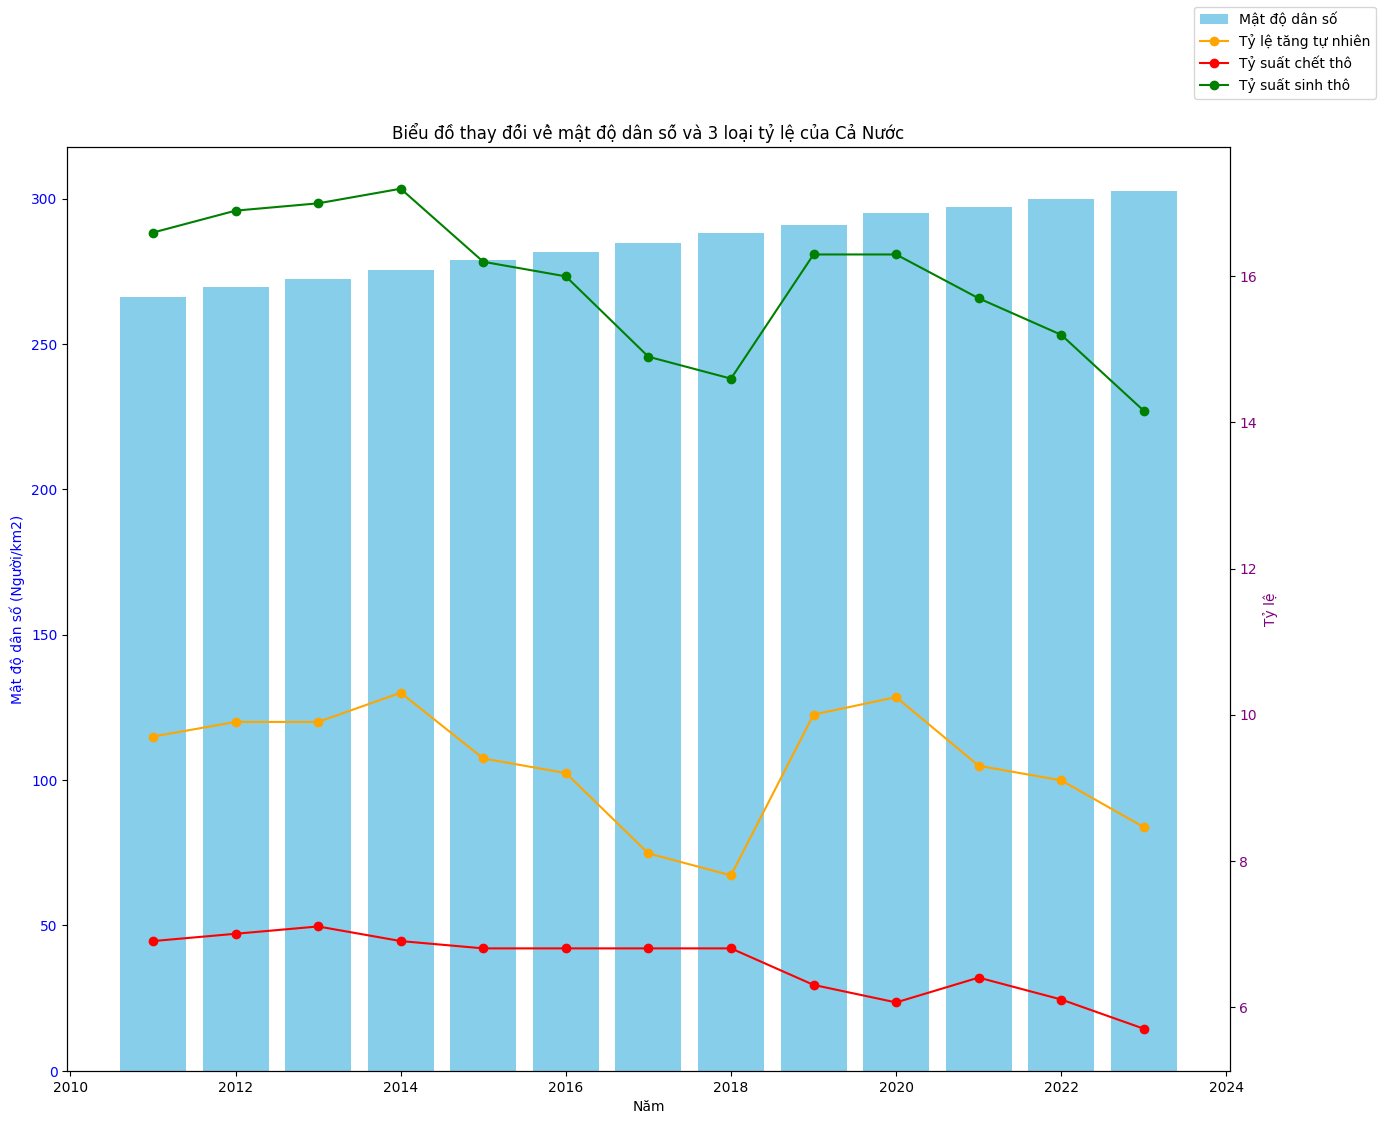

In [93]:

fig, ax1 = plt.subplots(figsize=(15, 12))
ax1.bar(vietnam_df['Năm'], vietnam_df['Mật độ dân số (Người/km2)'], color='skyblue', label='Mật độ dân số')
ax1.set_xlabel('Năm')
ax1.set_ylabel('Mật độ dân số (Người/km2)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()
ax2.plot(vietnam_df['Năm'], vietnam_df['Tỷ lệ tăng tự nhiên'], color='orange', marker='o', label='Tỷ lệ tăng tự nhiên')
ax2.set_ylabel('Tỷ lệ', color='purple')
ax2.tick_params(axis='y', labelcolor='purple')

ax2.plot(vietnam_df['Năm'], vietnam_df['Tỷ suất chết thô'], color='red', marker='o', label='Tỷ suất chết thô')

ax2.plot(vietnam_df['Năm'], vietnam_df['Tỷ suất sinh thô'], color='green', marker='o', label='Tỷ suất sinh thô')

fig.legend(loc='upper right')

plt.title('Biểu đồ thay đổi về mật độ dân số và 3 loại tỷ lệ của Cả Nước')
plt.show()

Từ biểu đồ có thể thấy được mật độ dân số liên tục tăng dần đều theo các năm.

Tỷ lệ sinh thô cao hơn nhiều so với tỷ lệ chết thô. Cả 3 tỷ lệ đều có biến động, đặc biệt là năm 2017 - 2020.

Tỷ suất chết thô giảm nhẹ theo từng năm tuy nhiên tăng trở lại vào năm 2021 có thể do đại dịch Covid 19 ở Việt Nam.

### Histogram
Dùng Histogram để biểu diễn sự phân phối của 3 trường dữ liệu Tỷ suất sinh thô, Tỷ suất chết thô, Tỷ lệ gia tăng tự nhiên trên các thành phố theo các năm. Trong đó cột y là số thành phố, cột x là tỷ lệ. Số lượng thành phố ở một mức tỷ lệ nhất định sẽ được map vào độ dài tương ứng của từng cột.

In [94]:
def histogram(column, year, color, ax):
    sub_df = city_df[city_df['Năm'] == year]
    n, bins, patches = ax.hist(sub_df[column], bins=20, color=color, edgecolor='black')
    for i in range(len(patches)):
        height = patches[i].get_height()
        ax.text(patches[i].get_x() + patches[i].get_width() / 2, height,
                f'{int(height)}', ha='center', va='bottom')
    ax.set_xlabel(column)
    ax.set_ylabel('Số thành phố')
    ax.set_title(f'Histogram của {column} - {year}')
    ax.grid(True)

In [95]:
years = [2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]

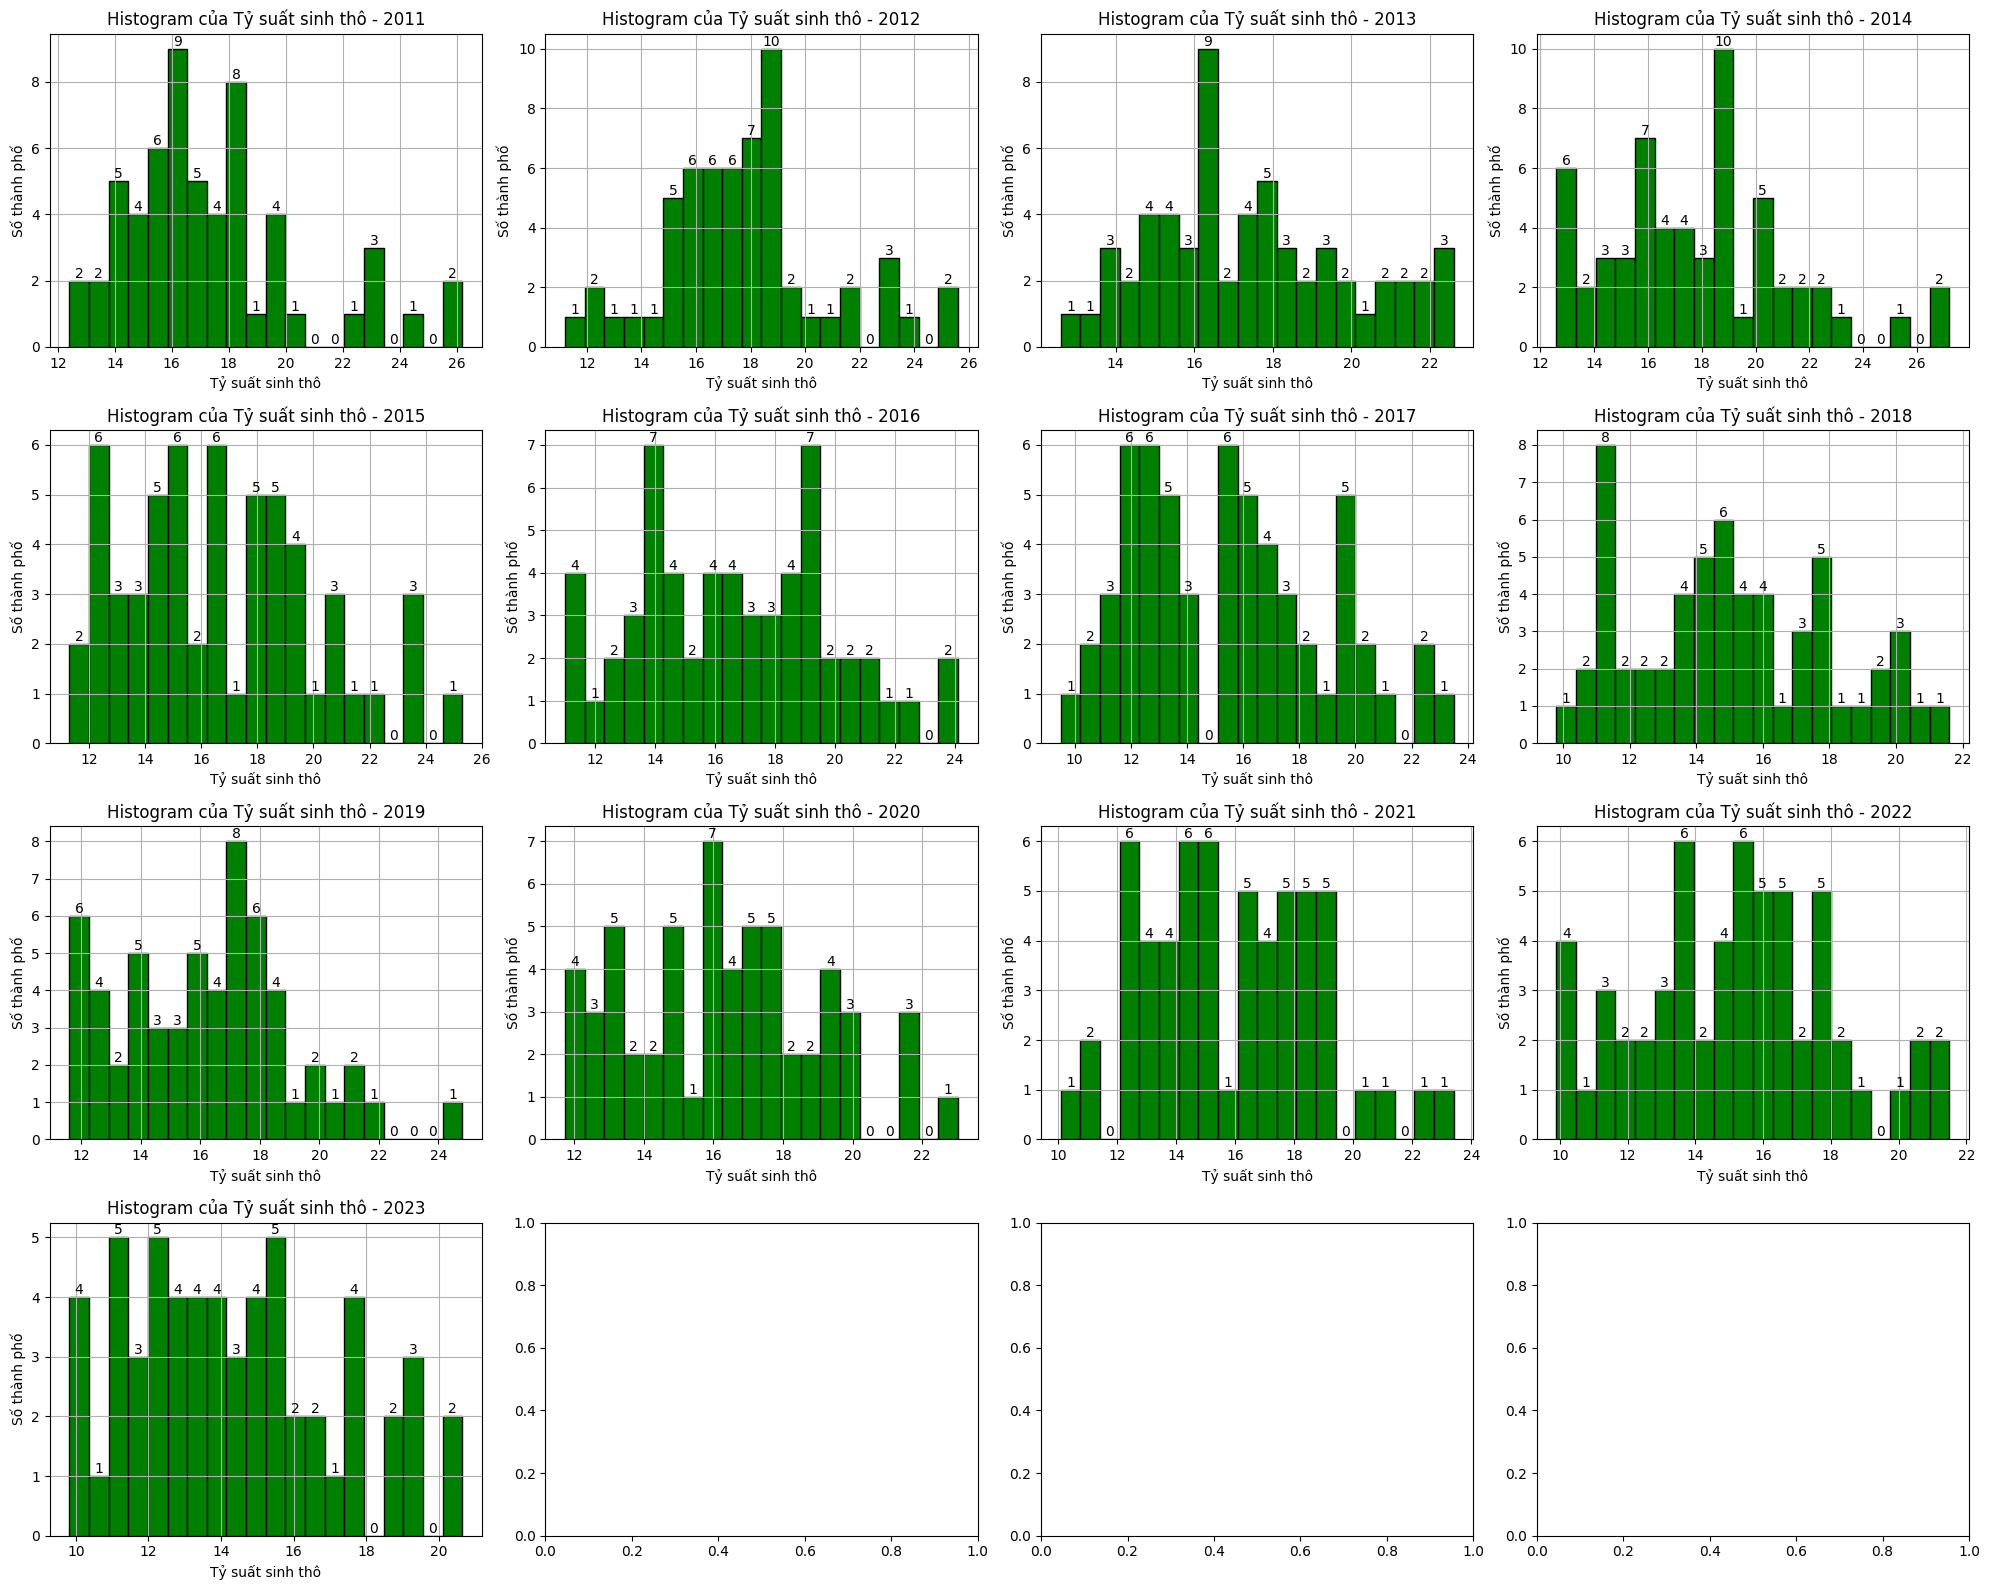

In [96]:
fig, axs = plt.subplots(4, 4, figsize=(20, 16))
axs = axs.flatten()

for index, year in enumerate(years):
  histogram('Tỷ suất sinh thô', year, 'green', axs[index])
plt.tight_layout()
plt.show()

Quan sát biểu đồ biến đổi theo từng năm, có thể thấy được tỷ suất sinh thô của các thành phố có xu hướng giảm dần (histogram di chuyển từ phải sang trái).

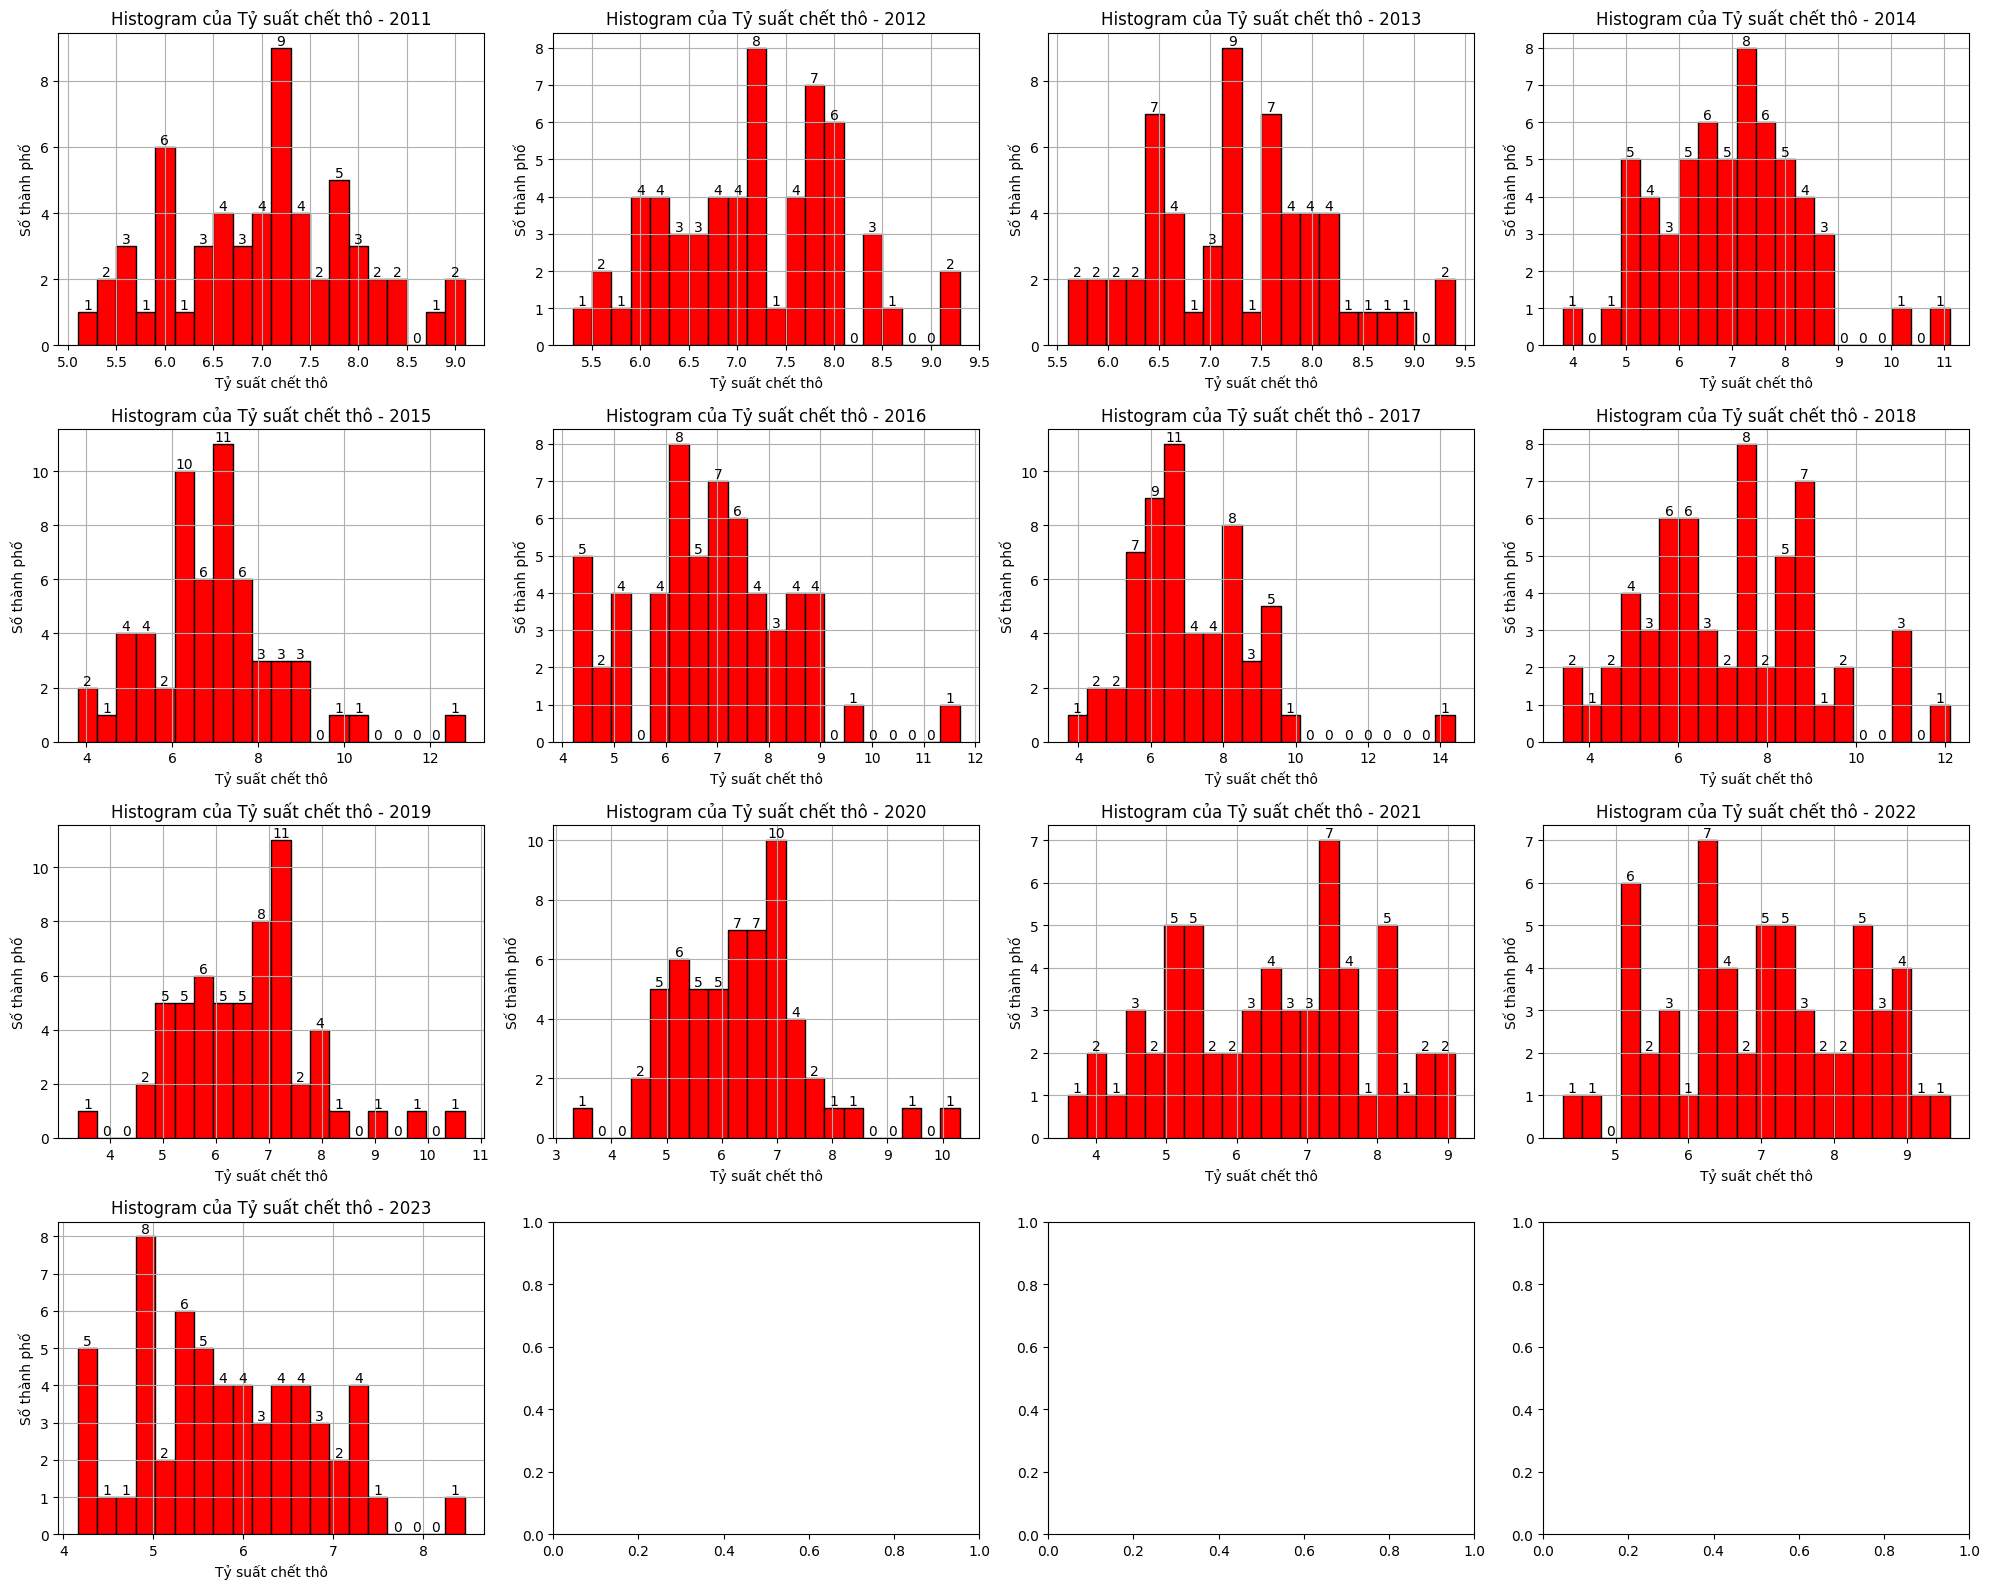

In [97]:
fig, axs = plt.subplots(4, 4, figsize=(20, 16))
axs = axs.flatten()

for index, year in enumerate(years):
  histogram('Tỷ suất chết thô', year, 'red', axs[index])
plt.tight_layout()
plt.show()

Tỷ suất chết thô thay đổi ít, histogram không dịch chuyển nhiều.

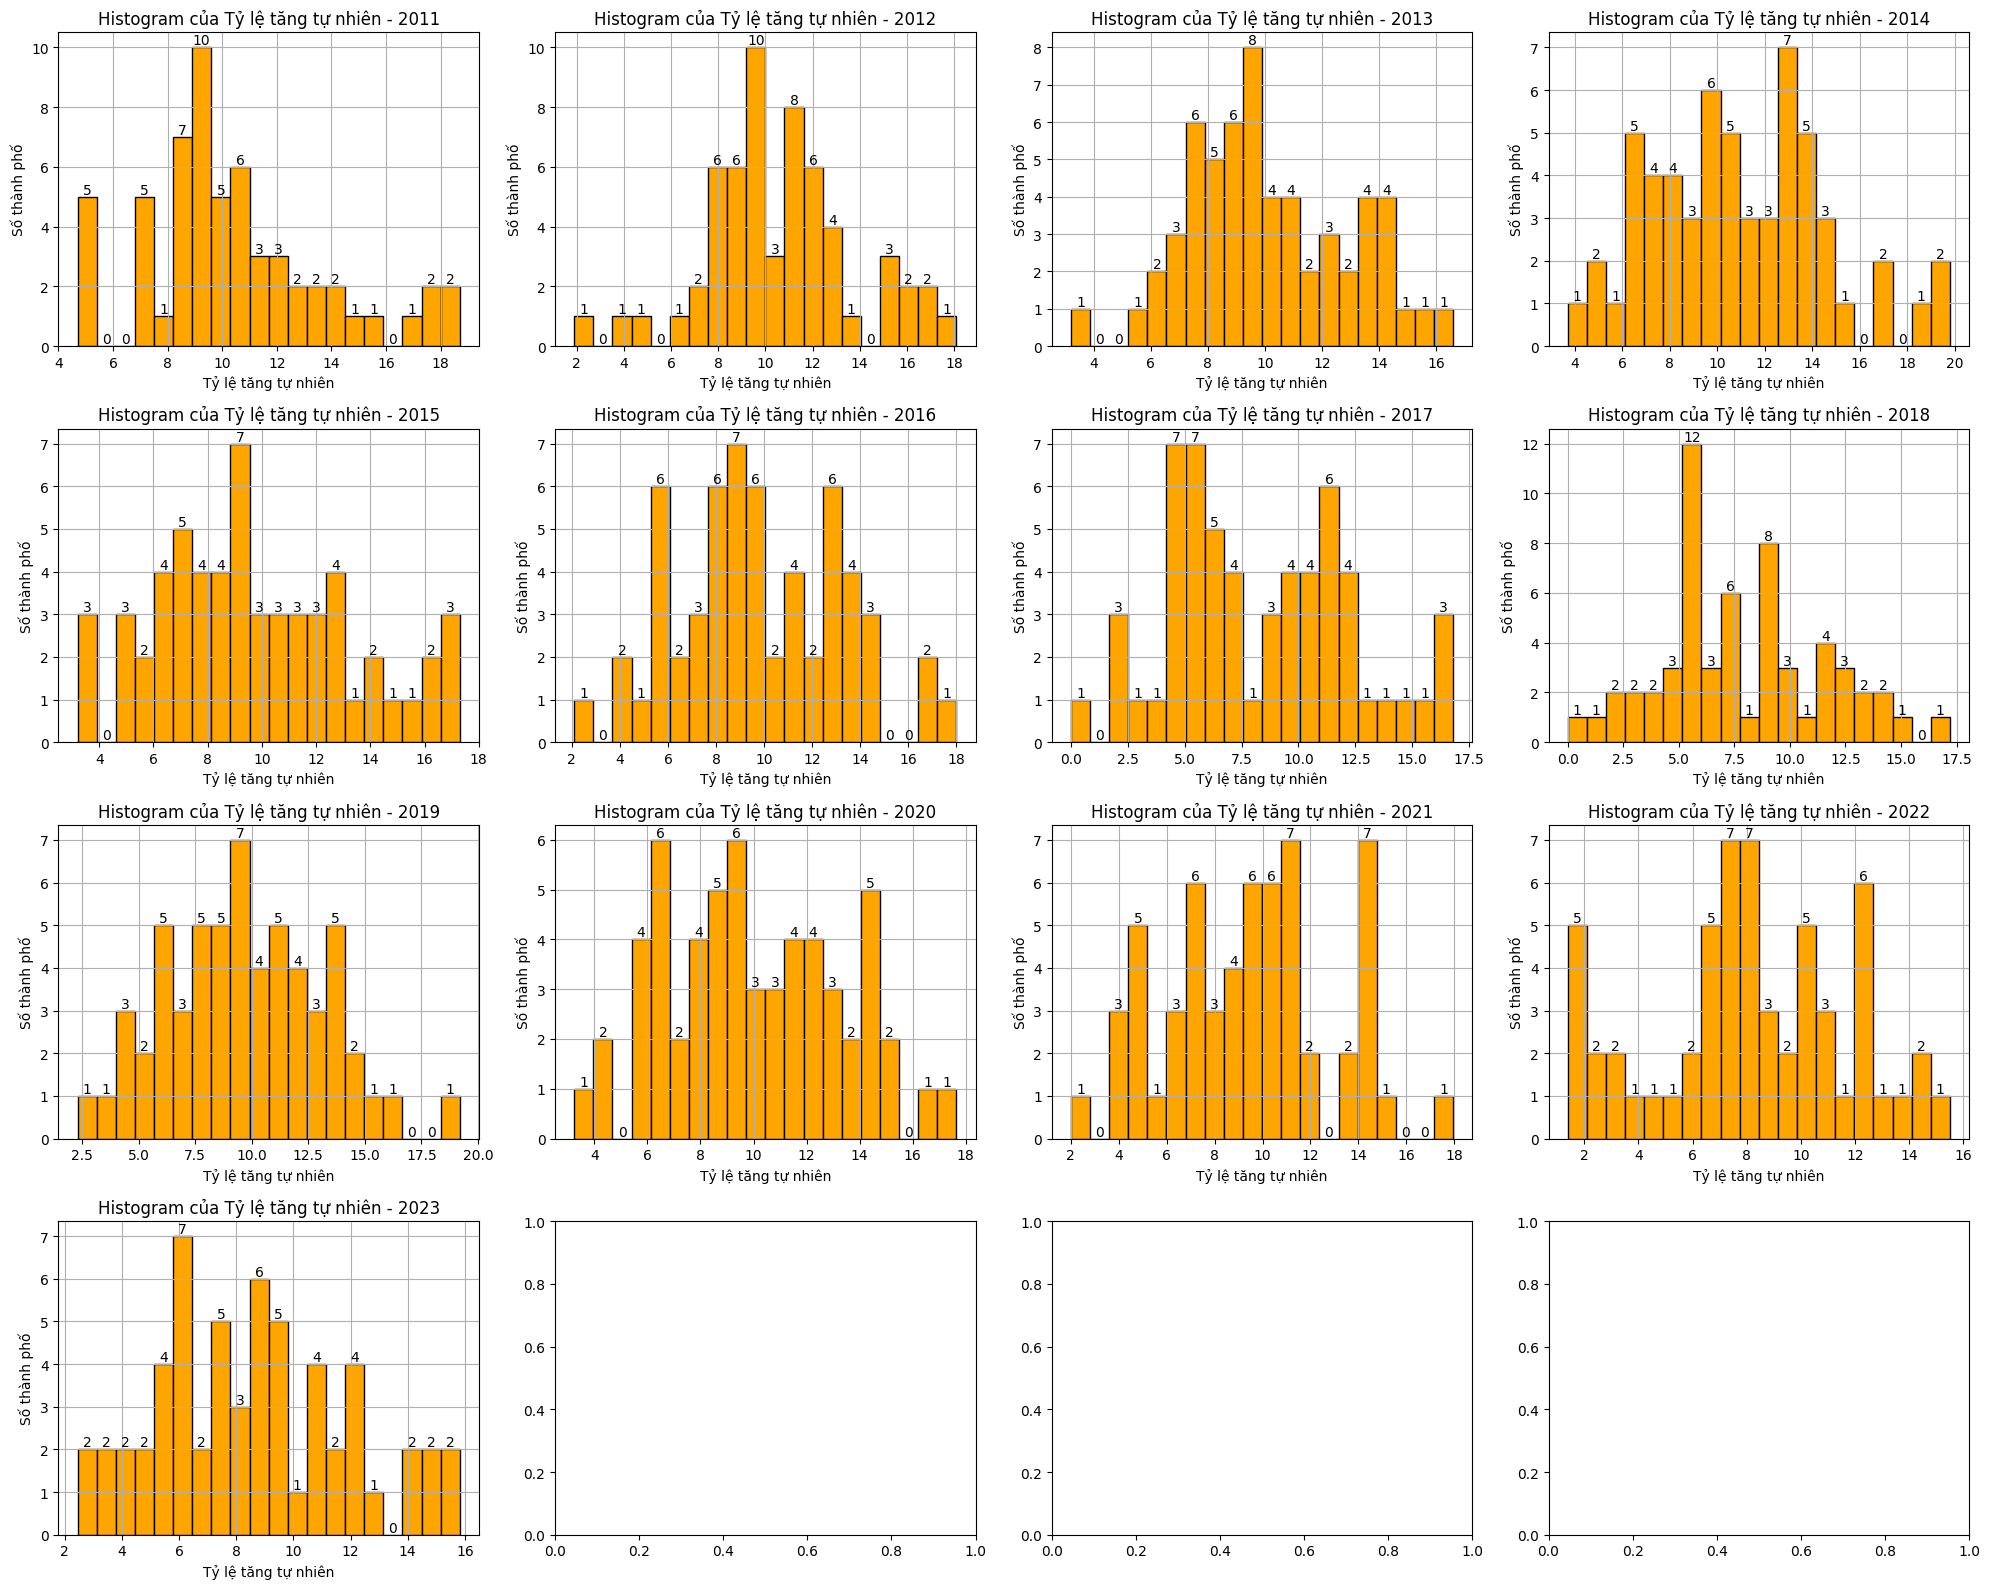

In [98]:
fig, axs = plt.subplots(4, 4, figsize=(20, 16))
axs = axs.flatten()

for index, year in enumerate(years):
  histogram('Tỷ lệ tăng tự nhiên', year, 'orange', axs[index])
plt.tight_layout()
plt.show()

Tỷ lệ gia tăng tự nhiên biến động theo từng năm, có thể thấy vào năm 2014 nhiều thành phố có tỷ lệ tăng tự nhiên tập trung ở mức từ 10 đến 14. Tỷ lệ tăng tự nhiên thấp nhất vào năm 2017 và 2018, sau đó lại bắt đầu tăng cho đến năm 2021 và bắt đầu giảm từ năm 2022 đến 2023.

### Boxplot

In [99]:
color_map = {
    'Bắc Trung Bộ Và Duyên Hải Miền Trung': 'orange',
    'Trung Du Và Miền Núi Phía Bắc': 'yellow',
    'Đông Nam Bộ': 'green',
    'Đồng Bằng Sông Cửu Long': 'blue',
    'Đồng Bằng Sông Hồng': 'pink',
    'Tây Nguyên': 'brown',
}

<ipython-input-100-e18b13a5dec7>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Địa phương', y='Tỷ suất sinh thô', data=area_df, palette=color_map)


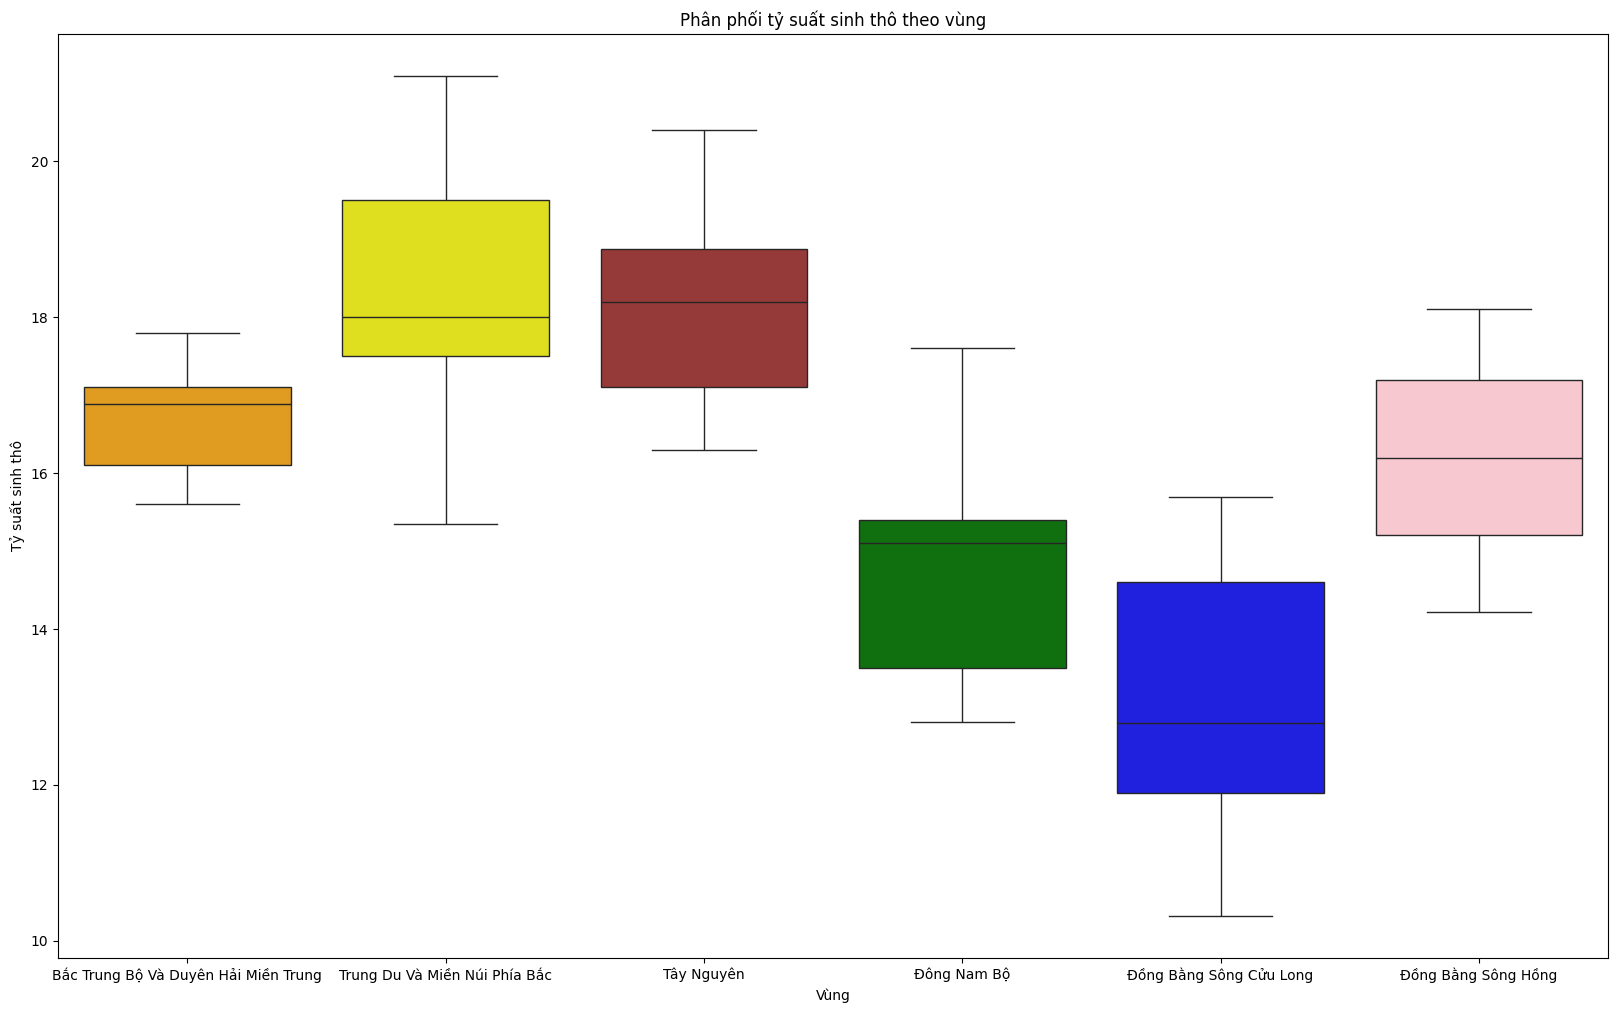

In [100]:
plt.figure(figsize=(20, 12))
sns.boxplot(x='Địa phương', y='Tỷ suất sinh thô', data=area_df, palette=color_map)
plt.xlabel('Vùng')
plt.ylabel('Tỷ suất sinh thô')
plt.title('Phân phối tỷ suất sinh thô theo vùng')
plt.show()

Tây Nguyên và Trung Du và Miền Núi Phía Bắc có tỷ suất sinh thô cao hơn, có thể do đặc điểm kinh tế - xã hội hoặc văn hóa.

Đông Nam Bộ và Đồng Bằng Sông Cửu Long có tỷ suất sinh thô thấp, điều này có thể liên quan đến mức độ đô thị hóa và sự phát triển kinh tế.

Đồng Bằng Sông Cửu Long có khoảng phân tán lớn nhất, thể hiện sự chênh lệch đáng kể qua các năm của các địa phương trong vùng.

Bắc Trung Bộ và Duyên Hải Miền Trung có khoảng phân tán nhỏ nhất, cho thấy sự đồng đều hơn trong tỷ suất sinh thô qua các năm của các địa phương trong vùng.

<ipython-input-101-7e0c8707853b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Địa phương', y='Tỷ suất chết thô', data=area_df, palette=color_map)


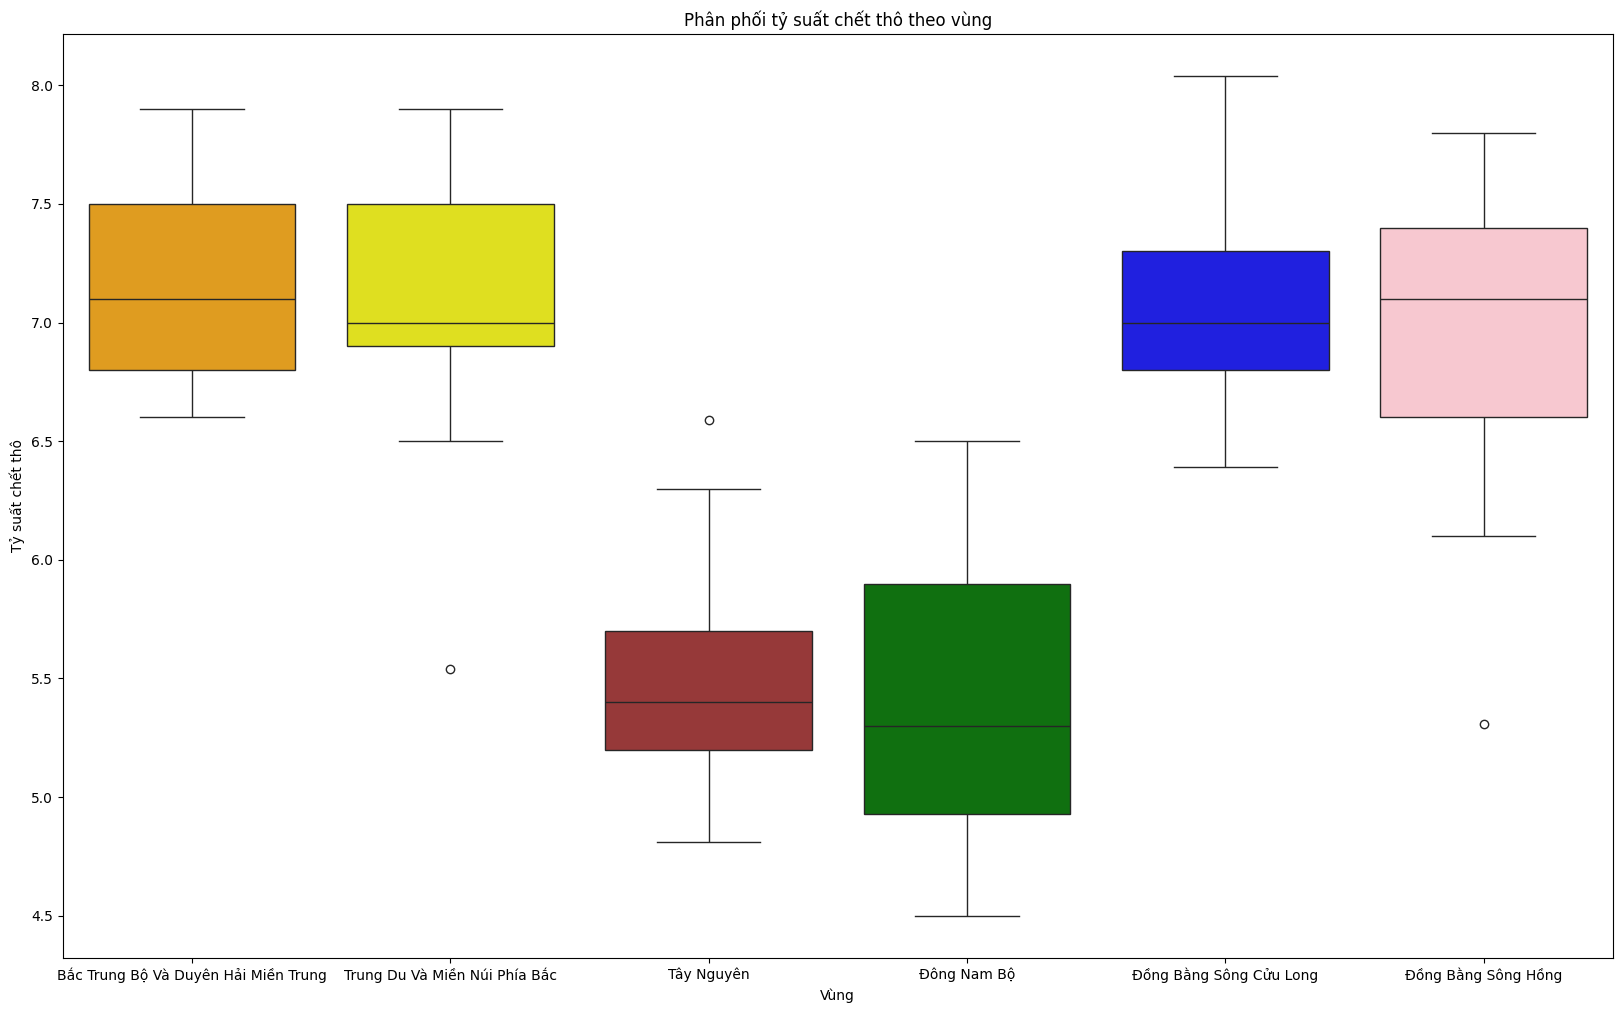

In [101]:
plt.figure(figsize=(20, 12))
sns.boxplot(x='Địa phương', y='Tỷ suất chết thô', data=area_df, palette=color_map)
plt.xlabel('Vùng')
plt.ylabel('Tỷ suất chết thô')
plt.title('Phân phối tỷ suất chết thô theo vùng')
plt.show()


Bắc Trung Bộ và Duyên Hải Miền Trung và Trung Du và Miền Núi Phía Bắc có tỷ suất chết cao hơn, có thể liên quan đến các yếu tố như điều kiện tự nhiên khắc nghiệt hoặc chất lượng dịch vụ y tế.

Đông Nam Bộ có độ phân tán lớn nhất, cho thấy sự biến động giữa các tỉnh trong vùng qua các năm.

Tây Nguyên và Đông Nam Bộ có tỷ suất chết thấp hơn, phản ánh điều kiện y tế tốt hơn hoặc cấu trúc dân số trẻ hơn.

### Line Chart

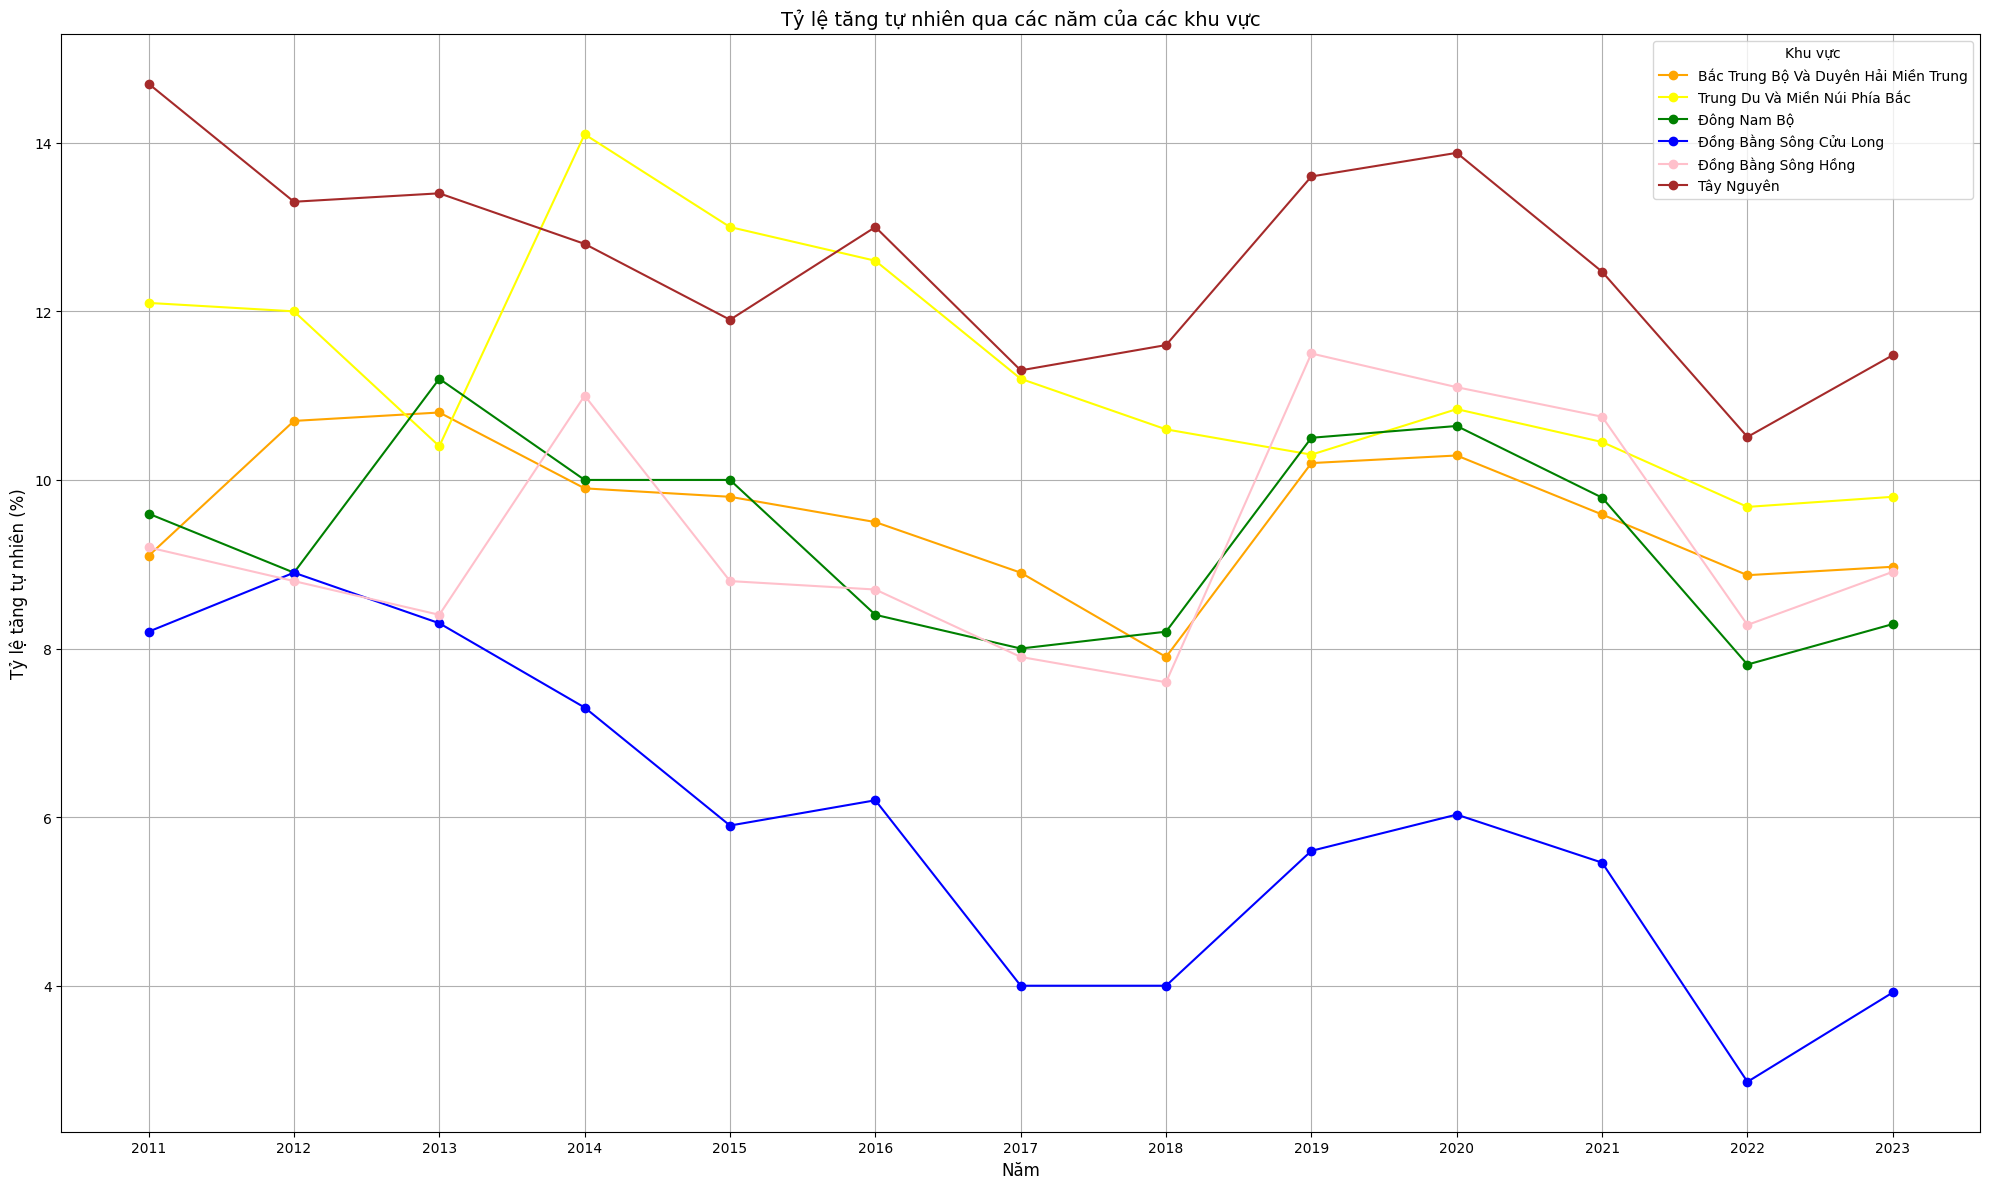

In [102]:
plt.figure(figsize=(20, 12))
for region in area:
    region_data = area_df[area_df['Địa phương'] == region]
    plt.plot(region_data['Năm'], region_data['Tỷ lệ tăng tự nhiên'],
             label=region, marker='o', color=color_map[region])

plt.title('Tỷ lệ tăng tự nhiên qua các năm của các khu vực', fontsize=14)
plt.xlabel('Năm', fontsize=12)
plt.ylabel('Tỷ lệ tăng tự nhiên (%)', fontsize=12)

plt.legend(title='Khu vực')

plt.grid(True)
plt.xticks(area_df['Năm'].unique())
plt.tight_layout()
plt.show()

Xu hướng chung:

*   Tỷ lệ tăng tự nhiên ở các khu vực có xu hướng giảm dần qua các năm.
*   Một số khu vực có sự biến động lớn ở một số thời điểm, nhưng xu hướng dài hạn vẫn là giảm.

Phân tích từng khu vực:
*   Tây Nguyên: Khu vực này có tỷ lệ tăng tự nhiên cao nhất so với các khu vực khác trong hầu hết các năm. Tuy nhiên, tỷ lệ này cũng giảm rõ rệt sau năm 2020.
*   Đồng bằng Sông Cửu Long: Đây là khu vực có tỷ lệ tăng tự nhiên thấp nhất, với sự giảm đều từ 2012-2018 và tăng nhẹ từ 2018-2020 sau đó tiếp tục giảm mạnh.
*   Đồng bằng Sông Hồng, Bắc Trung Bộ và Duyên Hải Miền Trung, Đông Nam Bộ: Biến động tương đối ổn định, nhưng xu hướng giảm nhẹ.
*   Trung du và miền núi phía Bắc: Tỷ lệ tăng tự nhiên tăng mạnh từ 2013-2014 sau đó giảm dần qua từng năm.



### Bar Chart

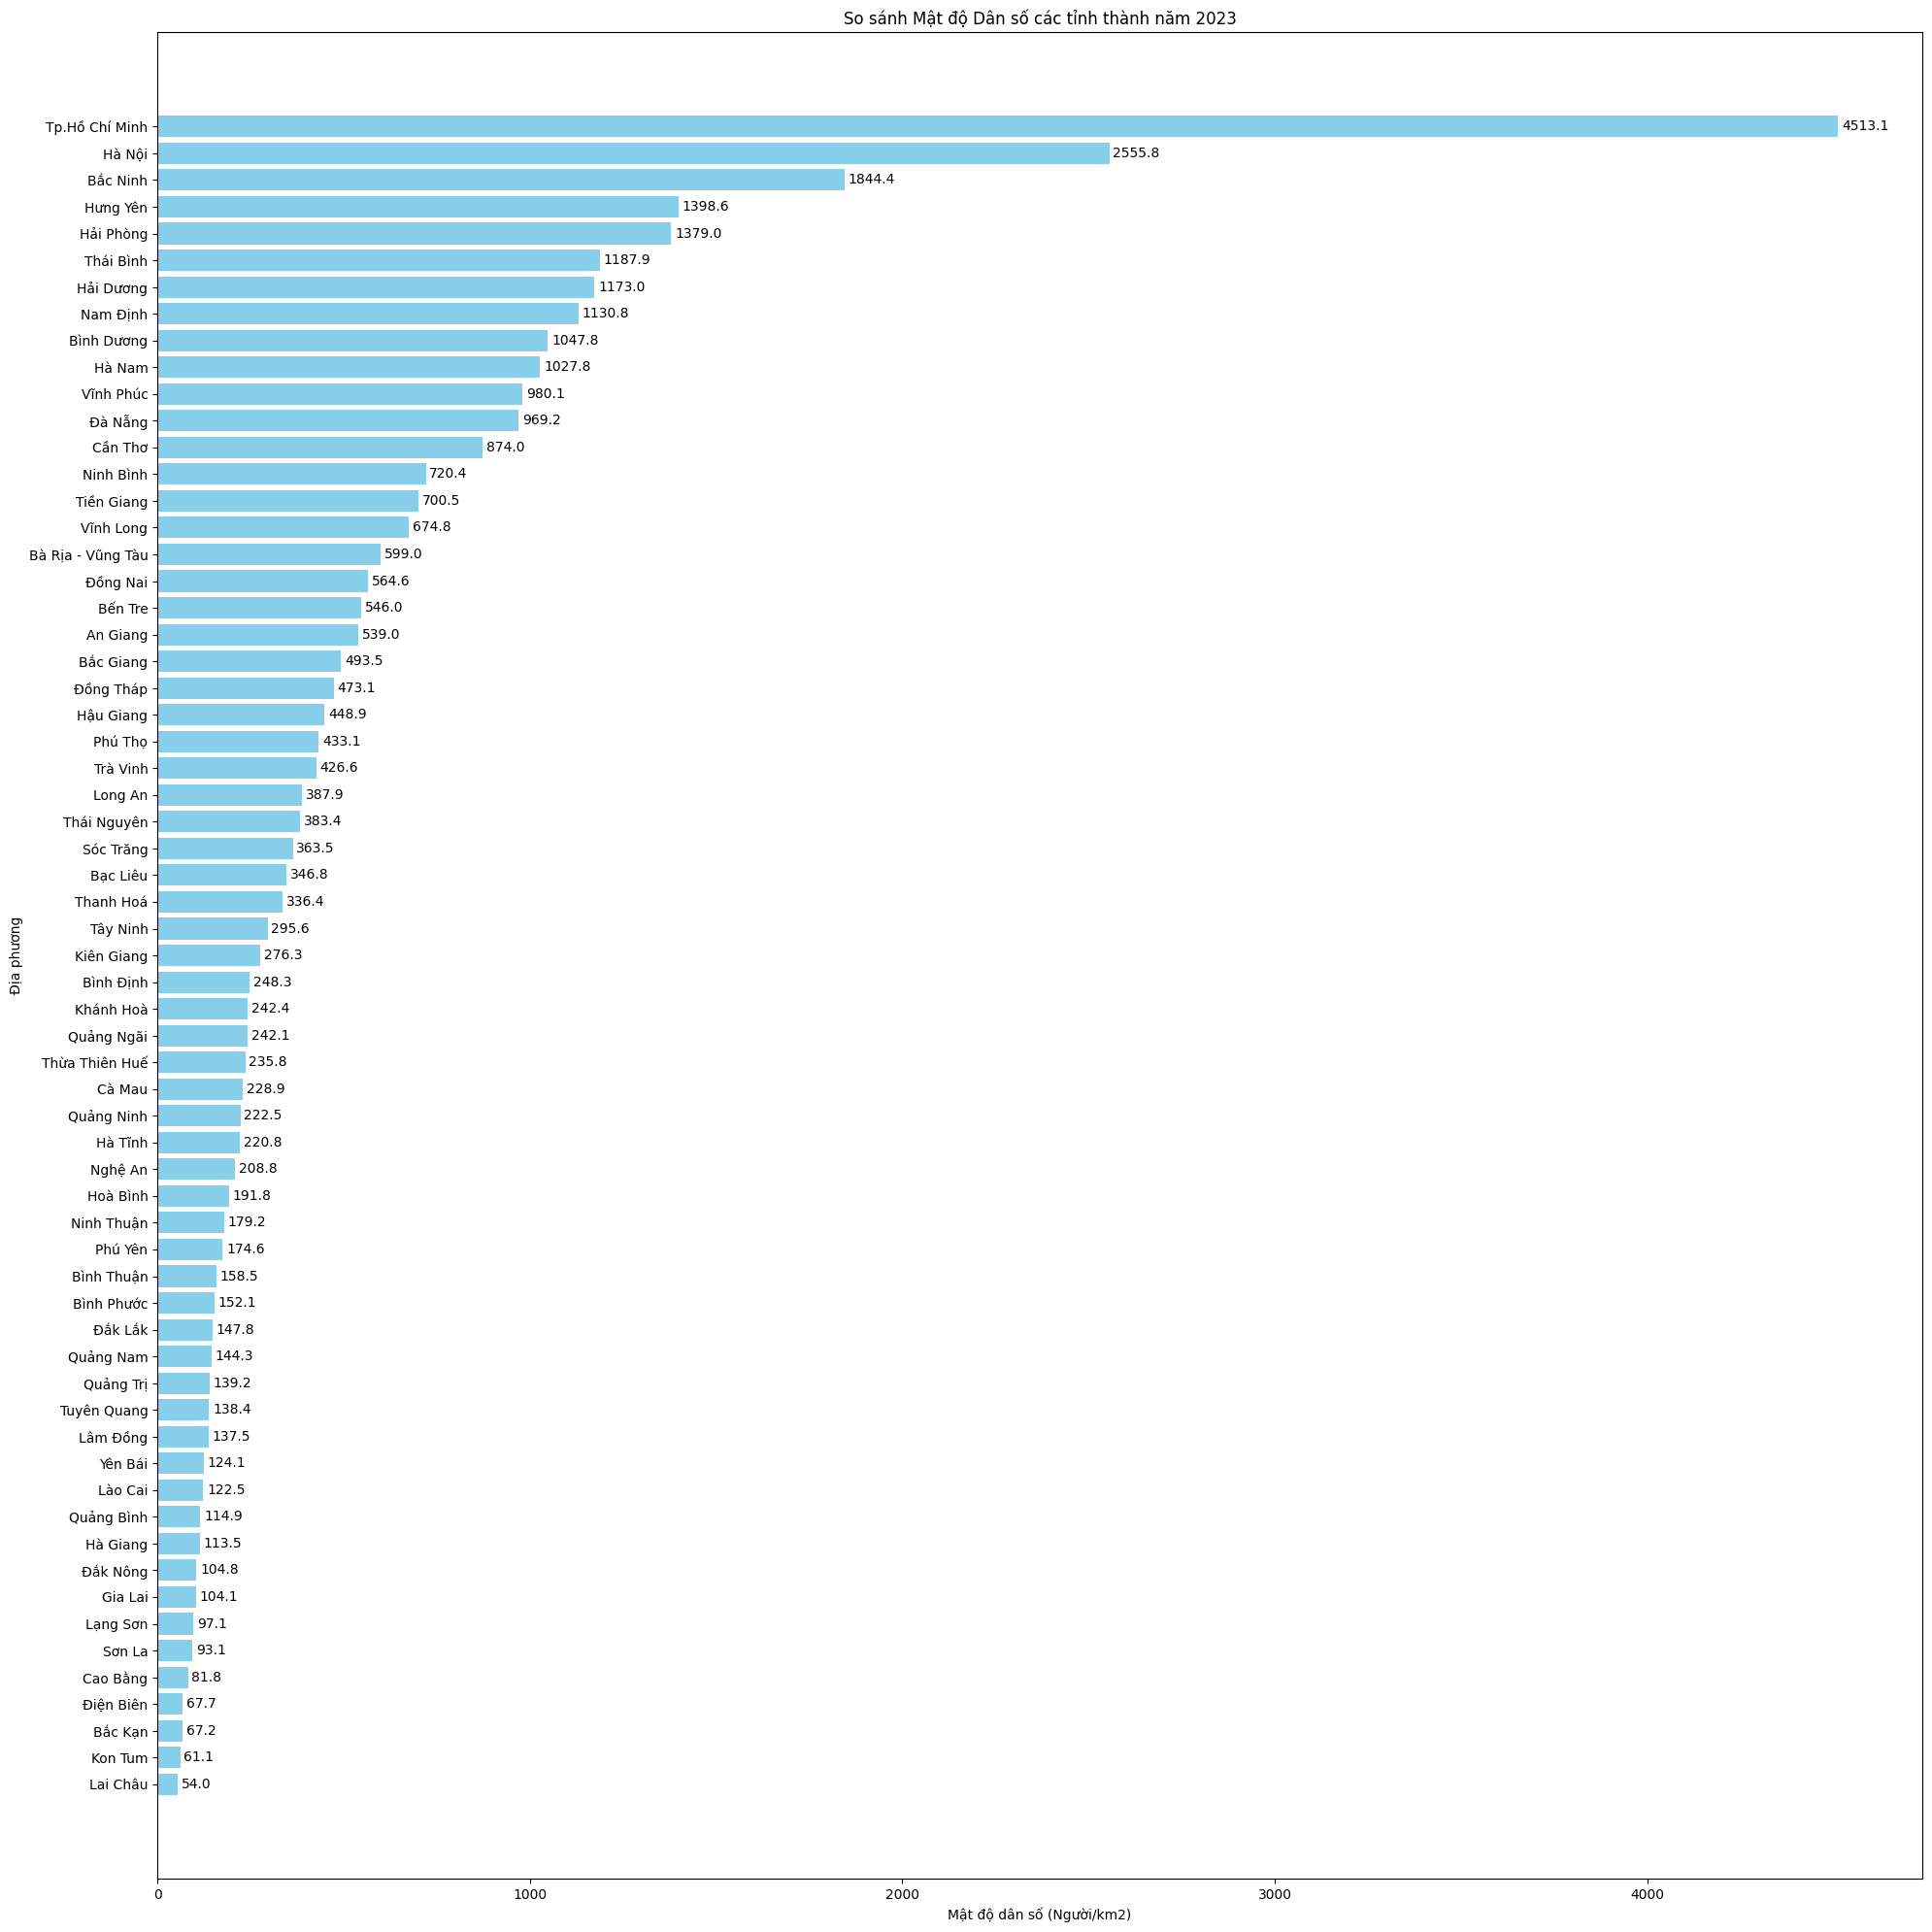

In [103]:
df_2023 = city_df[city_df['Năm'] == 2023 ].sort_values(by='Mật độ dân số (Người/km2)', ascending=True)

plt.figure(figsize=(20, 20))
bars = plt.barh(df_2023['Địa phương'], df_2023['Mật độ dân số (Người/km2)'], color='skyblue')

plt.title('So sánh Mật độ Dân số các tỉnh thành năm 2023')
plt.xlabel('Mật độ dân số (Người/km2)')
plt.ylabel('Địa phương')

for bar in bars:
    width = bar.get_width()
    plt.text(width + 10, bar.get_y() + bar.get_height() / 2, f'{width:.1f}', va='center', fontsize=10)

plt.tight_layout()
plt.show()

* TP. Hồ Chí Minh: Dẫn đầu với mật độ dân số cao nhất, vượt xa các tỉnh/thành khác, đạt 4.611,3 người/km².
* Hà Nội: Đứng thứ hai với mật độ 2.555,8 người/km²
* Bắc Ninh và Hải Phòng: Xếp ở các vị trí tiếp theo với mật độ lần lượt là 1.844,4 người/km² và 1.396,6 người/km², tập trung tại vùng kinh tế trọng điểm phía Bắc.
* Các tỉnh miền núi phía Bắc và Tây Nguyên như Lai Châu (54 người/km²), Kon Tum (61,1 người/km²), Sơn La (89,1 người/km²) có mật độ rất thấp, phản ánh sự phân bổ dân cư không đồng đều do địa hình khó khăn và ít điều kiện phát triển kinh tế.

Đồng bằng sông Hồng và khu vực Đông Nam Bộ là những vùng có mật độ dân số cao nhất cả nước, nhờ tập trung nhiều đô thị lớn, khu công nghiệp và dịch vụ.

Miền núi phía Bắc và Tây Nguyên có mật độ dân số thấp nhất, do địa hình đồi núi và kinh tế kém phát triển hơn.

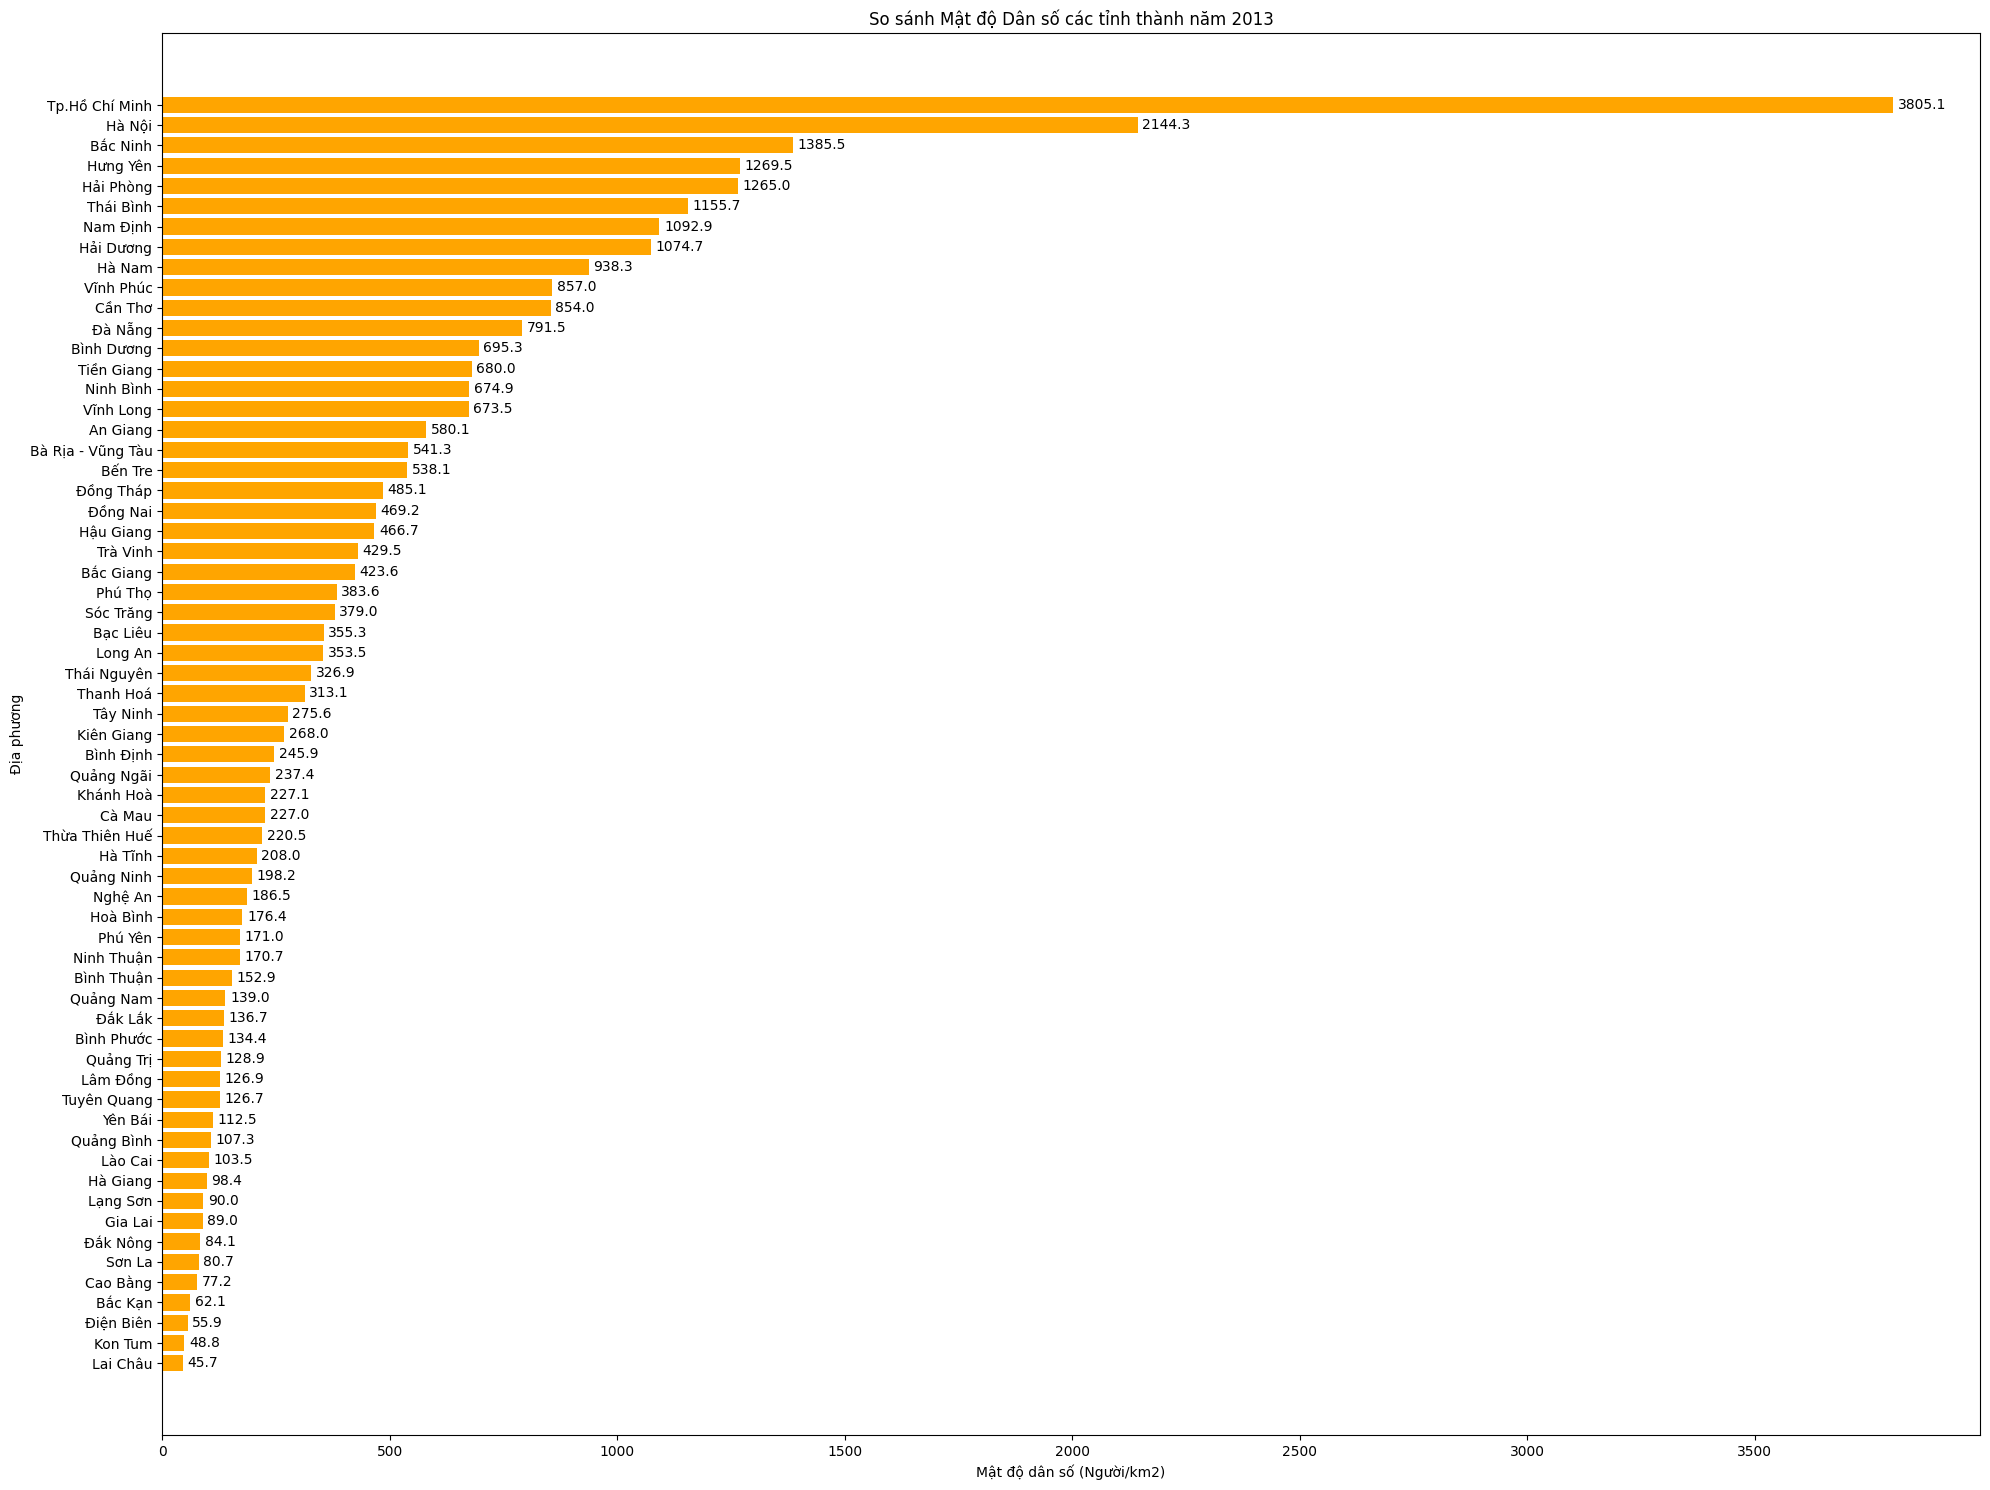

In [104]:
df_2013 = city_df[city_df['Năm'] == 2013 ].sort_values(by='Mật độ dân số (Người/km2)', ascending=True)

plt.figure(figsize=(20, 15))
bars = plt.barh(df_2013['Địa phương'], df_2013['Mật độ dân số (Người/km2)'], color='orange')

plt.title('So sánh Mật độ Dân số các tỉnh thành năm 2013')
plt.xlabel('Mật độ dân số (Người/km2)')
plt.ylabel('Địa phương')

for bar in bars:
    width = bar.get_width()
    plt.text(width + 10, bar.get_y() + bar.get_height() / 2, f'{width:.1f}', va='center', fontsize=10)

plt.tight_layout()
plt.show()

* TP. Hồ Chí Minh:

  * Năm 2013: 3.805,1 người/km².
  * Năm 2023: 4.611,3 người/km².

  Mật độ dân số đã tăng mạnh, cho thấy sự phát triển đô thị hóa nhanh chóng và sự tập trung dân cư vào thành phố lớn này.
* Hà Nội:
  * Năm 2013: 2.144,3 người/km².
  * Năm 2023: 2.555,8 người/km².

  Tăng trưởng mật độ dân số ở mức vừa phải, nhưng vẫn giữ vị trí là trung tâm lớn thứ hai cả nước.

Các tỉnh phát triển công nghiệp như Bình Dương, Hải Phòng, Đồng Nai tiếp tục ghi nhận sự gia tăng mật độ dân số từ năm 2013 đến 2023, phản ánh vai trò quan trọng của khu vực trong nền kinh tế.

Các tỉnh miền núi (như Lai Châu, Sơn La, Kon Tum): Mật độ dân số tăng rất chậm, và vẫn duy trì ở mức thấp. Điều này cho thấy sự phát triển tại các khu vực này không có nhiều đột biến.

**Xu hướng chung:**
* Tăng tập trung ở đô thị: TP. Hồ Chí Minh, Hà Nội, Bắc Ninh, Hải Phòng đều ghi nhận mức tăng mật độ dân số đáng kể, cho thấy sự tập trung dân cư ở các khu vực đô thị hóa mạnh.
* Phân hóa vùng miền: Các tỉnh miền núi, nông thôn vẫn duy trì mức mật độ dân số thấp, và tốc độ tăng không đáng kể. Điều này có thể liên quan đến cơ sở hạ tầng và kinh tế chưa được phát triển đồng đều.

*Kết luận: Giai đoạn 2013-2023, sự phát triển không đồng đều giữa các khu vực tiếp tục được thể hiện qua sự khác biệt lớn trong mật độ dân số.*

In [105]:
def scatter(column1, column2, year, hue_col, size_col, ax):
    sub_df = city_df[city_df['Năm'] == year]
    sns.scatterplot(data=sub_df, x=column1, y=column2, size=size_col, palette='viridis', sizes=(50, 500), hue=hue_col, legend=False, ax=ax)
    ax.set_xlabel(f'{column1}')
    ax.set_ylabel(f'{column2}')
    ax.set_title(f'Scatterplot giữa {column1} và {column2} (Năm {year})')
    ax.grid(True)

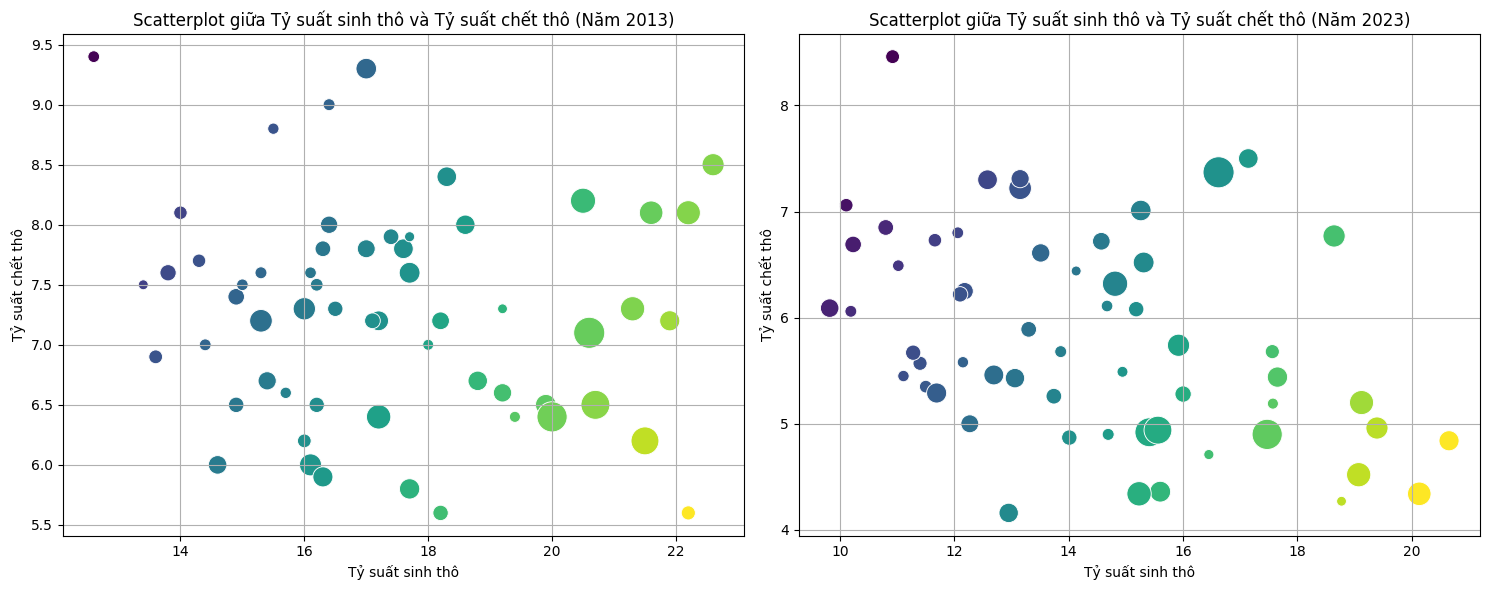

In [106]:
fig, axs = plt.subplots(1, 2, figsize=(15, 6))
axs = axs.flatten()
years = [2013, 2023]

for index, year in enumerate(years):
  scatter('Tỷ suất sinh thô', 'Tỷ suất chết thô', year, 'Tỷ lệ tăng tự nhiên', 'Diện tích(Km2)', axs[index])

plt.tight_layout()
plt.show()


Xu hướng tương quan:
  * Năm 2013:
    * Tỷ suất sinh thô và tỷ suất chết thô có vẻ tương quan dương nhẹ, tức là ở các tỉnh/thành có tỷ suất sinh thô cao hơn, tỷ suất chết thô cũng có xu hướng cao hơn.
    * Điều này có thể phản ánh các khu vực có mức độ phát triển thấp hơn (như vùng nông thôn hoặc miền núi), nơi tỷ suất sinh thô cao và điều kiện y tế kém dẫn đến tỷ suất chết thô cao.
  * Năm 2023:
    * Tương quan giữa tỷ suất sinh thô và tỷ suất chết thô có vẻ giảm, thể hiện qua sự phân tán các điểm dữ liệu. Các khu vực có tỷ suất sinh thô cao không nhất thiết đi kèm với tỷ suất chết thô cao như trước.
    * Xu hướng này có thể phản ánh sự cải thiện trong y tế và chất lượng sống tại một số khu vực.

Nhận định:

Mối quan hệ: Tỷ suất sinh thô và tỷ suất chết thô từng có mối quan hệ tương quan nhẹ(2013) nhưng mối tương quan này đã suy giảm vào năm 2023. Điều này có thể do các yếu tố kinh tế, y tế và xã hội đã thay đổi đáng kể trong thập kỷ qua.

Xu hướng giảm sinh: Sự giảm tỷ suất sinh là xu hướng chung khi Việt Nam chuyển sang giai đoạn dân số già hóa.

Y tế cải thiện: Tỷ suất chết thô giảm tại nhiều khu vực, phản ánh các tiến bộ trong lĩnh vực chăm sóc sức khỏe và điều kiện sống.

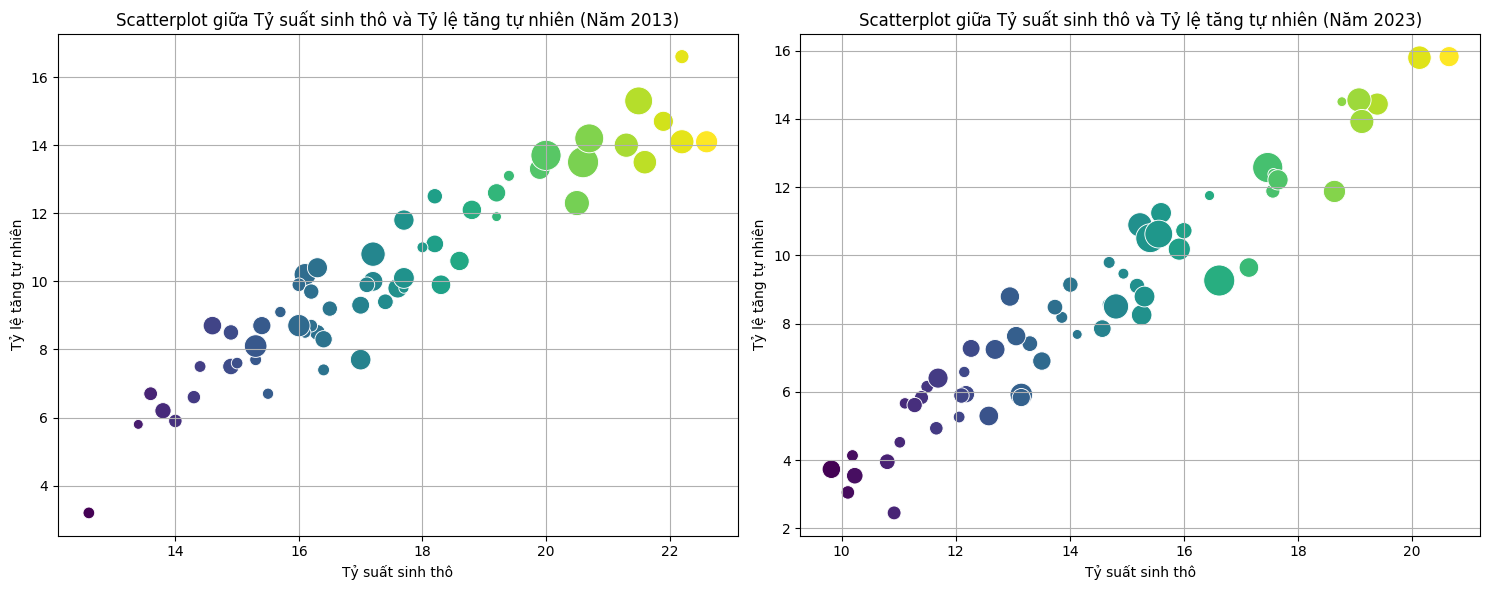

In [107]:
fig, axs = plt.subplots(1, 2, figsize=(15, 6))
axs = axs.flatten()
years = [2013, 2023]

for index, year in enumerate(years):
  scatter('Tỷ suất sinh thô', 'Tỷ lệ tăng tự nhiên', year, 'Tỷ suất sinh thô', 'Diện tích(Km2)', axs[index])

plt.tight_layout()
plt.show()


Xu hướng tương quan:

  * Năm 2013:
    * Có một tương quan tuyến tính mạnh mẽ giữa tỷ suất sinh thô và tỷ lệ tăng tự nhiên.
    * Các khu vực có tỷ suất sinh thô cao thường có tỷ lệ tăng tự nhiên cao hơn, phản ánh mối quan hệ logic: khi tỷ suất sinh tăng mà tỷ suất chết không đáng kể, tỷ lệ tăng tự nhiên sẽ cao.
    * Điểm dữ liệu tập trung trong khoảng tỷ suất sinh từ 14-22 và tỷ lệ tăng tự nhiên từ 6-16.
  *Năm 2023:

    * Mối quan hệ giữa hai chỉ số này vẫn duy trì tương quan tuyến tính, nhưng phân bố dữ liệu đã thay đổi.
    * Tỷ suất sinh thô đã giảm đáng kể ở hầu hết các khu vực, khiến tỷ lệ tăng tự nhiên cũng giảm tương ứng.
    * Dữ liệu tập trung trong khoảng tỷ suất sinh từ 10-18 và tỷ lệ tăng tự nhiên từ 2-12, cho thấy xu hướng giảm sinh ảnh hưởng rõ rệt đến tăng tự nhiên.

Nhận định:

Mối tương quan giữa tỷ suất sinh thô và tỷ lệ tăng tự nhiên vẫn mạnh, nhưng giá trị của cả hai chỉ số này đã giảm đáng kể qua thời gian.

Xu hướng giảm sinh thô và tăng tự nhiên phù hợp với quá trình chuyển đổi dân số tại Việt Nam, trong đó các yếu tố như kinh tế, y tế, và nhận thức về quy mô gia đình.

Sự phân hóa giữa các khu vực có thể xuất phát từ sự khác biệt về mức độ đô thị hóa, phát triển kinh tế và chính sách địa phương.

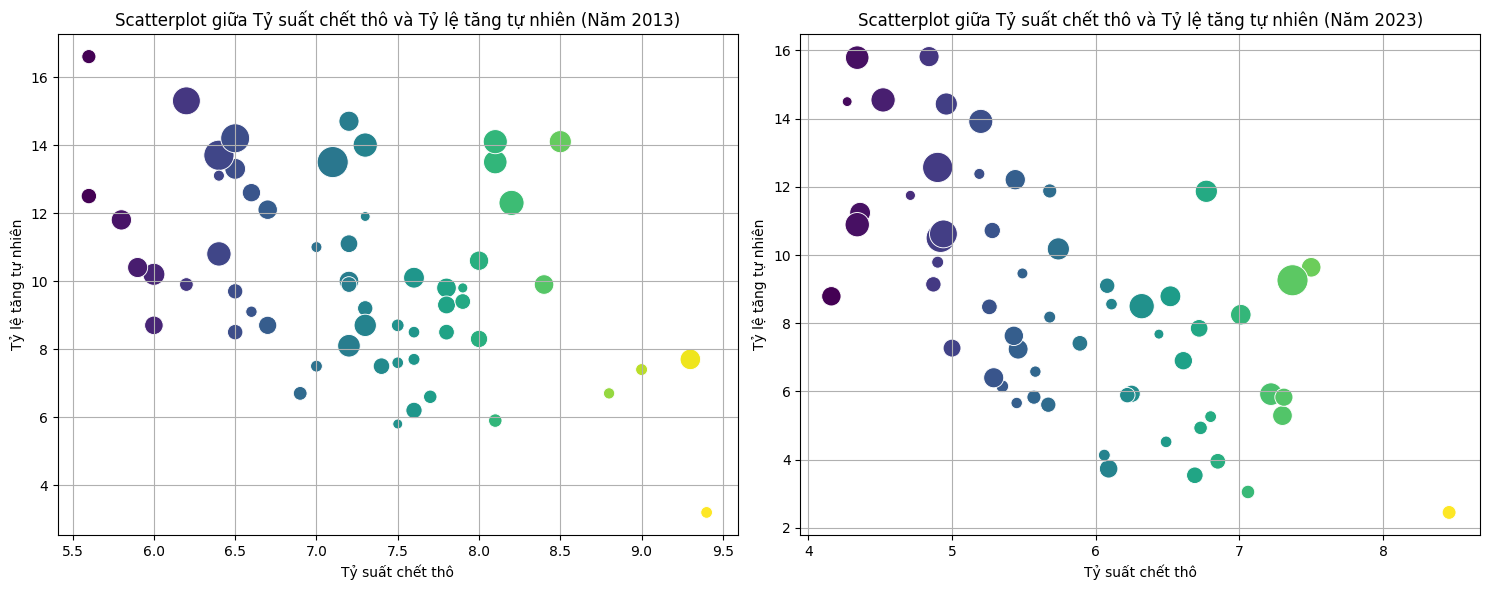

In [108]:
fig, axs = plt.subplots(1, 2, figsize=(15, 6))
axs = axs.flatten()
years = [2013, 2023]

for index, year in enumerate(years):
  scatter('Tỷ suất chết thô', 'Tỷ lệ tăng tự nhiên', year, 'Tỷ suất chết thô', 'Diện tích(Km2)', axs[index])

plt.tight_layout()
plt.show()


Xu hướng tương quan:
  * Năm 2013:

    * Mối quan hệ giữa tỷ suất chết thô và tỷ lệ tăng tự nhiên có xu hướng nghịch biến: các khu vực có tỷ suất chết thô cao thường có tỷ lệ tăng tự nhiên thấp hơn.
    * Các điểm dữ liệu tập trung trong khoảng tỷ suất chết thô từ 6-9 và tỷ lệ tăng tự nhiên từ 6-16.
    * Một số khu vực có tỷ lệ tăng tự nhiên cao bất chấp tỷ suất chết thô cao, điều này có thể do tỷ suất sinh thô tại các khu vực này đủ lớn để bù đắp tỷ suất chết.
  * Năm 2023:
    * Xu hướng nghịch biến vẫn được duy trì.
    * Tỷ suất chết thô giảm ở nhiều khu vực, phổ biến trong khoảng 4-7.
    * Tỷ lệ tăng tự nhiên giảm, tập trung trong khoảng 2-12.

In [109]:
city_df['Địa phương'].unique()

array(['An Giang', 'Bà Rịa - Vũng Tàu', 'Bình Dương', 'Bình Phước',
       'Bình Thuận', 'Bình Định', 'Bạc Liêu', 'Bắc Giang', 'Bắc Kạn',
       'Bắc Ninh', 'Bến Tre', 'Cao Bằng', 'Cà Mau', 'Cần Thơ', 'Gia Lai',
       'Hoà Bình', 'Hà Giang', 'Hà Nam', 'Hà Nội', 'Hà Tĩnh', 'Hưng Yên',
       'Hải Dương', 'Hải Phòng', 'Hậu Giang', 'Khánh Hoà', 'Kiên Giang',
       'Kon Tum', 'Lai Châu', 'Long An', 'Lào Cai', 'Lâm Đồng',
       'Lạng Sơn', 'Nam Định', 'Nghệ An', 'Ninh Bình', 'Ninh Thuận',
       'Phú Thọ', 'Phú Yên', 'Quảng Bình', 'Quảng Nam', 'Quảng Ngãi',
       'Quảng Ninh', 'Quảng Trị', 'Sóc Trăng', 'Sơn La', 'Thanh Hoá',
       'Thái Bình', 'Thái Nguyên', 'Thừa Thiên Huế', 'Tiền Giang',
       'Tp.Hồ Chí Minh', 'Trà Vinh', 'Tuyên Quang', 'Tây Ninh',
       'Vĩnh Long', 'Vĩnh Phúc', 'Yên Bái', 'Điện Biên', 'Đà Nẵng',
       'Đắk Lắk', 'Đắk Nông', 'Đồng Nai', 'Đồng Tháp'], dtype=object)

In [110]:
gdf = gpd.read_file('/content/diaphantinh.geojson')

In [111]:
set(gdf['ten_tinh'].unique()) - set(city_df['Địa phương'].unique())

{'Bà Rịa -Vũng Tàu',
 'Cần Thơn',
 'Hòa Bình',
 'Khánh Hòa',
 'Kien Giang',
 'Quản Bình',
 'TP. Hồ Chí Minh',
 'Thanh Hóa',
 'Đăk Lăk',
 'Đăk Nông'}

In [112]:
set(city_df['Địa phương'].unique()) - set(gdf['ten_tinh'].unique())

{'Bà Rịa - Vũng Tàu',
 'Cần Thơ',
 'Hoà Bình',
 'Khánh Hoà',
 'Kiên Giang',
 'Quảng Bình',
 'Thanh Hoá',
 'Tp.Hồ Chí Minh',
 'Đắk Lắk',
 'Đắk Nông'}

In [113]:
def gdf_change_name(old_name, new_name):
    gdf['ten_tinh'] = gdf['ten_tinh'].str.replace(old_name, new_name)

In [114]:
gdf_change_name('Bà Rịa -Vũng Tàu', 'Bà Rịa - Vũng Tàu')
gdf_change_name('Cần Thơn', 'Cần Thơ')
gdf_change_name('Hòa Bình', 'Hoà Bình')
gdf_change_name('Khánh Hòa', 'Khánh Hoà')
gdf_change_name('Quản Bình', 'Quảng Bình')
gdf_change_name('Kien Giang', 'Kiên Giang')
gdf_change_name('TP. Hồ Chí Minh', 'Tp.Hồ Chí Minh')
gdf_change_name('Thanh Hóa', 'Thanh Hoá')
gdf_change_name('Đăk Lăk', 'Đắk Lắk')
gdf_change_name('Đăk Nông', 'Đắk Nông')

In [115]:
merged_gdf = gdf.merge(city_df, left_on='ten_tinh', right_on='Địa phương')

In [116]:
set(city_df['Địa phương'].unique()) - set(merged_gdf['Địa phương'].unique())

set()

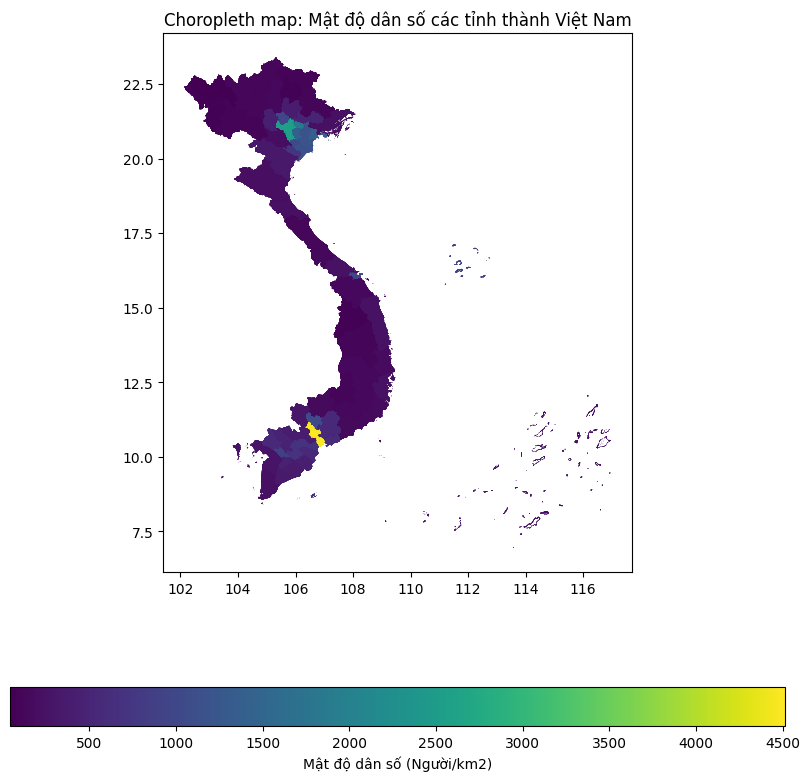

In [117]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
merged_gdf.plot(column='Mật độ dân số (Người/km2)', ax=ax, legend=True,
         legend_kwds={'label': "Mật độ dân số (Người/km2)", 'orientation': "horizontal"})
plt.title('Choropleth map: Mật độ dân số các tỉnh thành Việt Nam')
plt.show()